In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, Markdown
import warnings
warnings.filterwarnings('ignore')

## DATAFRAMES POR INSTANCIA

In [2]:
# Leer los datos del archivo csv en el archivo de la carpeta output y guardarlos en un dataframe
df = pd.read_csv('../output/results.csv')
df

,Filename,Depositos,Vendedores,Greedy_cost,Greedy_time,Greedy_free,Binpacking_cost,Binpacking_time,Binpacking_free,Swap(Greedy)_cost,...,Swap+Relocate(Bin Packing)_free,Relocate+Swap(Greedy)_cost,Relocate+Swap(Greedy)_time,Relocate+Swap(Greedy)_free,Relocate+Swap(Bin Packing)_cost,Relocate+Swap(Bin Packing)_time,Relocate+Swap(Bin Packing)_free,Meta_cost,Meta_time,Meta_free
0,a05100,5,100,1709.0,0.125292,0,3206.0,0.368792,0,1700.0,...,0,1700.0,3.73521,0,1698.0,36.6090,0,2348.0,637,0
1,a20100,20,100,1170.0,0.074542,0,2972.0,0.309958,0,1168.0,...,0,1167.0,1.44117,0,1161.0,38.7935,0,2570.0,1321,0
2,a10100,10,100,1390.0,0.050917,0,2954.0,0.158334,0,1367.0,...,0,1365.0,1.91742,0,1363.0,26.0193,0,2534.0,943,0
3,a05200,5,200,3259.0,0.080458,0,6075.0,0.189834,0,3238.0,...,0,3238.0,5.91400,0,3235.0,136.2860,0,5021.0,1792,0
4,a20200,20,200,2371.0,0.147458,0,5855.0,0.601167,0,2353.0,...,0,2353.0,7.28275,0,2345.0,245.2690,0,4738.0,5790,0
5,a10200,10,200,2670.0,0.102417,0,6183.0,0.317084,0,2632.0,...,0,2628.0,15.04920,0,2629.0,193.9880,0,4913.0,4189,0
6,b10200,10,200,8255.0,0.093125,42,6031.0,0.316042,0,7788.0,...,0,6779.0,79.38680,33,3007.0,164.9340,0,5824.0,1975,22
7,b20200,20,200,3628.0,0.157250,7,5860.0,0.623792,0,3335.0,...,0,2439.0,60.82380,0,2437.0,242.2750,0,3231.0,2399,2
8,b05200,5,200,8050.0,0.072292,40,6059.0,0.202333,0,7487.0,...,0,7444.0,74.99020,37,3640.0,125.9310,0,6987.0,1753,31
9,b10100,10,100,2115.0,0.050917,4,2980.0,0.167500,0,1952.0,...,0,1500.0,7.61942,0,1439.0,31.4977,0,1717.0,872,0


In [3]:
# column name contains the word cost
heuristics = df.columns[df.columns.str.contains('cost')].map(lambda x: x.split('_')[0]).unique()
heuristics

Index(['Greedy', 'Binpacking', 'Swap(Greedy)', 'Swap(Bin Packing)',
       'Relocate(Greedy)', 'Relocate(Bin Packing)', 'Swap+Relocate(Greedy)',
       'Swap+Relocate(Bin Packing)', 'Relocate+Swap(Greedy)',
       'Relocate+Swap(Bin Packing)', 'Meta'],
      dtype='object')

In [4]:
df["InstanceGroup"] = df["Filename"].str[0]
df

,Filename,Depositos,Vendedores,Greedy_cost,Greedy_time,Greedy_free,Binpacking_cost,Binpacking_time,Binpacking_free,Swap(Greedy)_cost,...,Relocate+Swap(Greedy)_cost,Relocate+Swap(Greedy)_time,Relocate+Swap(Greedy)_free,Relocate+Swap(Bin Packing)_cost,Relocate+Swap(Bin Packing)_time,Relocate+Swap(Bin Packing)_free,Meta_cost,Meta_time,Meta_free,InstanceGroup
0,a05100,5,100,1709.0,0.125292,0,3206.0,0.368792,0,1700.0,...,1700.0,3.73521,0,1698.0,36.6090,0,2348.0,637,0,a
1,a20100,20,100,1170.0,0.074542,0,2972.0,0.309958,0,1168.0,...,1167.0,1.44117,0,1161.0,38.7935,0,2570.0,1321,0,a
2,a10100,10,100,1390.0,0.050917,0,2954.0,0.158334,0,1367.0,...,1365.0,1.91742,0,1363.0,26.0193,0,2534.0,943,0,a
3,a05200,5,200,3259.0,0.080458,0,6075.0,0.189834,0,3238.0,...,3238.0,5.91400,0,3235.0,136.2860,0,5021.0,1792,0,a
4,a20200,20,200,2371.0,0.147458,0,5855.0,0.601167,0,2353.0,...,2353.0,7.28275,0,2345.0,245.2690,0,4738.0,5790,0,a
5,a10200,10,200,2670.0,0.102417,0,6183.0,0.317084,0,2632.0,...,2628.0,15.04920,0,2629.0,193.9880,0,4913.0,4189,0,a
6,b10200,10,200,8255.0,0.093125,42,6031.0,0.316042,0,7788.0,...,6779.0,79.38680,33,3007.0,164.9340,0,5824.0,1975,22,b
7,b20200,20,200,3628.0,0.157250,7,5860.0,0.623792,0,3335.0,...,2439.0,60.82380,0,2437.0,242.2750,0,3231.0,2399,2,b
8,b05200,5,200,8050.0,0.072292,40,6059.0,0.202333,0,7487.0,...,7444.0,74.99020,37,3640.0,125.9310,0,6987.0,1753,31,b
9,b10100,10,100,2115.0,0.050917,4,2980.0,0.167500,0,1952.0,...,1500.0,7.61942,0,1439.0,31.4977,0,1717.0,872,0,b


In [5]:
# Separo las instancias
a_instance = df[df["InstanceGroup"] == "a"]
b_instance = df[df["InstanceGroup"] == "b"]
e_instance = df[df["InstanceGroup"] == "e"]
real_instance = df[df["InstanceGroup"] == "r"]


In [6]:
instances = df["InstanceGroup"].unique()

## Costo de cada instancia

In [7]:
# COSTO DE CADA INSTANCIA
costs = [df[df["InstanceGroup"] == i] for i in instances]

#if column contains "time" or "free", filter it

for cost in costs:
    cost = cost.drop(cost.columns[cost.columns.str.contains('time')], axis=1, inplace=True)

for cost in costs:
    cost = cost.drop(cost.columns[cost.columns.str.contains('free')], axis=1, inplace=True)

costs[0]

,Filename,Depositos,Vendedores,Greedy_cost,Binpacking_cost,Swap(Greedy)_cost,Swap(Bin Packing)_cost,Relocate(Greedy)_cost,Relocate(Bin Packing)_cost,Swap+Relocate(Greedy)_cost,Swap+Relocate(Bin Packing)_cost,Relocate+Swap(Greedy)_cost,Relocate+Swap(Bin Packing)_cost,Meta_cost,InstanceGroup
0,a05100,5,100,1709.0,3206.0,1700.0,1712.0,1709.0,1719.0,1700.0,1699.0,1700.0,1698.0,2348.0,a
1,a20100,20,100,1170.0,2972.0,1168.0,1245.0,1170.0,1165.0,1168.0,1163.0,1167.0,1161.0,2570.0,a
2,a10100,10,100,1390.0,2954.0,1367.0,1395.0,1390.0,1369.0,1367.0,1369.0,1365.0,1363.0,2534.0,a
3,a05200,5,200,3259.0,6075.0,3238.0,3258.0,3259.0,3236.0,3238.0,3235.0,3238.0,3235.0,5021.0,a
4,a20200,20,200,2371.0,5855.0,2353.0,2423.0,2371.0,2357.0,2353.0,2354.0,2353.0,2345.0,4738.0,a
5,a10200,10,200,2670.0,6183.0,2632.0,2677.0,2670.0,2636.0,2632.0,2633.0,2628.0,2629.0,4913.0,a


## Tiempo de cada instancia

In [8]:
# COSTO DE CADA INSTANCIA
times = [df[df["InstanceGroup"] == i] for i in instances]

#if column contains "cost" or "free", filter it

for time in times:
    time = time.drop(time.columns[time.columns.str.contains('cost')], axis=1, inplace=True)

for time in times:
    time = time.drop(time.columns[time.columns.str.contains('free')], axis=1, inplace=True)

times[0]

,Filename,Depositos,Vendedores,Greedy_time,Binpacking_time,Swap(Greedy)_time,Swap(Bin Packing)_time,Relocate(Greedy)_time,Relocate(Bin Packing)_time,Swap+Relocate(Greedy)_time,Swap+Relocate(Bin Packing)_time,Relocate+Swap(Greedy)_time,Relocate+Swap(Bin Packing)_time,Meta_time,InstanceGroup
0,a05100,5,100,0.125292,0.368792,3.67896,36.3424,0.264083,4.98304,1.59033,7.03517,3.73521,36.6090,637,a
1,a20100,20,100,0.074542,0.309958,1.17204,34.6973,0.206625,15.93470,1.36125,16.75970,1.44117,38.7935,1321,a
2,a10100,10,100,0.050917,0.158334,1.74425,25.2252,0.118459,7.28850,1.85883,7.64700,1.91742,26.0193,943,a
3,a05200,5,200,0.080458,0.189834,5.83462,135.6930,0.157499,12.19400,5.93587,14.71380,5.91400,136.2860,1792,a
4,a20200,20,200,0.147458,0.601167,7.04383,237.0990,0.392708,58.61140,7.32383,62.74570,7.28275,245.2690,5790,a
5,a10200,10,200,0.102417,0.317084,14.60730,191.5960,0.233834,29.05380,15.35910,33.14720,15.04920,193.9880,4189,a


## Vendedores sin asignar de cada instancia

In [9]:
# Libres
frees = [df[df["InstanceGroup"] == i] for i in instances]

#if column contains "time" or "cost", filter it

for free in frees:
    free = free.drop(free.columns[free.columns.str.contains('cost')], axis=1, inplace=True)

for free in frees:
    free = free.drop(free.columns[free.columns.str.contains('time')], axis=1, inplace=True)

frees[0]

,Filename,Depositos,Vendedores,Greedy_free,Binpacking_free,Swap(Greedy)_free,Swap(Bin Packing)_free,Relocate(Greedy)_free,Relocate(Bin Packing)_free,Swap+Relocate(Greedy)_free,Swap+Relocate(Bin Packing)_free,Relocate+Swap(Greedy)_free,Relocate+Swap(Bin Packing)_free,Meta_free,InstanceGroup
0,a05100,5,100,0,0,0,0,0,0,0,0,0,0,0,a
1,a20100,20,100,0,0,0,0,0,0,0,0,0,0,0,a
2,a10100,10,100,0,0,0,0,0,0,0,0,0,0,0,a
3,a05200,5,200,0,0,0,0,0,0,0,0,0,0,0,a
4,a20200,20,200,0,0,0,0,0,0,0,0,0,0,0,a
5,a10200,10,200,0,0,0,0,0,0,0,0,0,0,0,a


In [10]:
# Print de las instancias
display(Markdown('## Instancia A'))
display(a_instance)

display(Markdown('## Instancia B'))
display(b_instance)

display(Markdown('## Instancia E'))
display(e_instance)

display(Markdown('## Instancia Real'))
display(real_instance)

## Instancia A

,Filename,Depositos,Vendedores,Greedy_cost,Greedy_time,Greedy_free,Binpacking_cost,Binpacking_time,Binpacking_free,Swap(Greedy)_cost,...,Relocate+Swap(Greedy)_cost,Relocate+Swap(Greedy)_time,Relocate+Swap(Greedy)_free,Relocate+Swap(Bin Packing)_cost,Relocate+Swap(Bin Packing)_time,Relocate+Swap(Bin Packing)_free,Meta_cost,Meta_time,Meta_free,InstanceGroup
0,a05100,5,100,1709.0,0.125292,0,3206.0,0.368792,0,1700.0,...,1700.0,3.73521,0,1698.0,36.6090,0,2348.0,637,0,a
1,a20100,20,100,1170.0,0.074542,0,2972.0,0.309958,0,1168.0,...,1167.0,1.44117,0,1161.0,38.7935,0,2570.0,1321,0,a
2,a10100,10,100,1390.0,0.050917,0,2954.0,0.158334,0,1367.0,...,1365.0,1.91742,0,1363.0,26.0193,0,2534.0,943,0,a
3,a05200,5,200,3259.0,0.080458,0,6075.0,0.189834,0,3238.0,...,3238.0,5.91400,0,3235.0,136.2860,0,5021.0,1792,0,a
4,a20200,20,200,2371.0,0.147458,0,5855.0,0.601167,0,2353.0,...,2353.0,7.28275,0,2345.0,245.2690,0,4738.0,5790,0,a
5,a10200,10,200,2670.0,0.102417,0,6183.0,0.317084,0,2632.0,...,2628.0,15.04920,0,2629.0,193.9880,0,4913.0,4189,0,a


## Instancia B

,Filename,Depositos,Vendedores,Greedy_cost,Greedy_time,Greedy_free,Binpacking_cost,Binpacking_time,Binpacking_free,Swap(Greedy)_cost,...,Relocate+Swap(Greedy)_cost,Relocate+Swap(Greedy)_time,Relocate+Swap(Greedy)_free,Relocate+Swap(Bin Packing)_cost,Relocate+Swap(Bin Packing)_time,Relocate+Swap(Bin Packing)_free,Meta_cost,Meta_time,Meta_free,InstanceGroup
6,b10200,10,200,8255.0,0.093125,42,6031.0,0.316042,0,7788.0,...,6779.0,79.38680,33,3007.0,164.9340,0,5824.0,1975,22,b
7,b20200,20,200,3628.0,0.157250,7,5860.0,0.623792,0,3335.0,...,2439.0,60.82380,0,2437.0,242.2750,0,3231.0,2399,2,b
8,b05200,5,200,8050.0,0.072292,40,6059.0,0.202333,0,7487.0,...,7444.0,74.99020,37,3640.0,125.9310,0,6987.0,1753,31,b
9,b10100,10,100,2115.0,0.050917,4,2980.0,0.167500,0,1952.0,...,1500.0,7.61942,0,1439.0,31.4977,0,1717.0,872,0,b
10,b20100,20,100,1660.0,0.081667,2,3006.0,0.318417,0,1512.0,...,1396.0,6.35067,1,1221.0,35.9576,0,1649.0,935,1,b
11,b05100,5,100,4972.0,0.033291,27,2979.0,0.095917,0,4677.0,...,4255.0,8.43604,24,1985.0,11.4043,0,4035.0,524,21,b


## Instancia E

,Filename,Depositos,Vendedores,Greedy_cost,Greedy_time,Greedy_free,Binpacking_cost,Binpacking_time,Binpacking_free,Swap(Greedy)_cost,...,Relocate+Swap(Greedy)_cost,Relocate+Swap(Greedy)_time,Relocate+Swap(Greedy)_free,Relocate+Swap(Bin Packing)_cost,Relocate+Swap(Bin Packing)_time,Relocate+Swap(Bin Packing)_free,Meta_cost,Meta_time,Meta_free,InstanceGroup
12,e401600,40,1600,3550530.0,1.487500,1186,1496530.0,10.160000,0,3528280.0,...,3529220.0,15572.60000,1185,1225240.0,87770.7000,0,3246260.0,66004,1021,e
13,e15900,15,900,1675160.0,0.365792,628,681052.0,2.060250,0,1665340.0,...,1668850.0,3235.63000,628,517134.0,13879.9000,0,1479390.0,22256,524,e
14,e60900,60,900,1879710.0,1.163000,615,868102.0,7.692170,0,1867030.0,...,1862450.0,3442.53000,613,672586.0,16297.7000,0,1735580.0,29177,533,e
15,e801600,80,1600,3559140.0,2.673870,1167,1563090.0,17.993400,0,3534730.0,...,3530260.0,15074.90000,1165,1249640.0,96466.6000,0,3222380.0,80002,1002,e
16,e30900,30,900,1900960.0,0.625000,643,807924.0,3.962870,0,1890960.0,...,1887360.0,2911.45000,643,629667.0,15426.5000,0,1702460.0,24296,539,e
17,e40400,40,400,739996.0,0.405250,239,368473.0,2.309920,0,733089.0,...,735610.0,389.05100,238,254557.0,1468.2500,0,686356.0,7518,209,e
18,e201600,20,1600,3261900.0,0.787500,1164,1350790.0,4.865210,0,3250960.0,...,3269260.0,15554.70000,1164,1076760.0,82726.9000,0,2961920.0,62718,984,e
19,e20400,20,400,746075.0,0.208833,265,320970.0,1.202080,0,741821.0,...,748802.0,330.83700,265,234469.0,1252.5700,0,680348.0,5688,226,e
20,e10400,10,400,633169.0,0.129666,261,272013.0,0.642667,0,628674.0,...,641301.0,336.82800,261,184732.0,1099.0600,0,581494.0,4924,228,e
21,e05100,5,100,92769.0,0.027167,46,53515.0,0.096250,0,91313.0,...,95558.0,5.18300,46,24232.0,16.7244,0,90266.0,475,42,e


## Instancia Real

,Filename,Depositos,Vendedores,Greedy_cost,Greedy_time,Greedy_free,Binpacking_cost,Binpacking_time,Binpacking_free,Swap(Greedy)_cost,...,Relocate+Swap(Greedy)_cost,Relocate+Swap(Greedy)_time,Relocate+Swap(Greedy)_free,Relocate+Swap(Bin Packing)_cost,Relocate+Swap(Bin Packing)_time,Relocate+Swap(Bin Packing)_free,Meta_cost,Meta_time,Meta_free,InstanceGroup
27,real_instance,310,1100,964.9,8.59083,0,10629.0,36.6643,0,824.2,...,747.9,17647.5,0,764.7,72517.6,0,9940.3,202450,0,r


## GRAFICOS

### 1. COSTOS

In [11]:
# row 10 from df

df.iloc[1]

Filename                             a20100
Depositos                                20
Vendedores                              100
Greedy_cost                          1170.0
Greedy_time                        0.074542
Greedy_free                               0
Binpacking_cost                      2972.0
Binpacking_time                    0.309958
Binpacking_free                           0
Swap(Greedy)_cost                    1168.0
Swap(Greedy)_time                   1.17204
Swap(Greedy)_free                         0
Swap(Bin Packing)_cost               1245.0
Swap(Bin Packing)_time              34.6973
Swap(Bin Packing)_free                    0
Relocate(Greedy)_cost                1170.0
Relocate(Greedy)_time              0.206625
Relocate(Greedy)_free                     0
Relocate(Bin Packing)_cost           1165.0
Relocate(Bin Packing)_time          15.9347
Relocate(Bin Packing)_free                0
Swap+Relocate(Greedy)_cost           1168.0
Swap+Relocate(Greedy)_time      

In [14]:
# how many rows in df
len(df)

28

Text(0.5, 0.98, 'Instancia A')

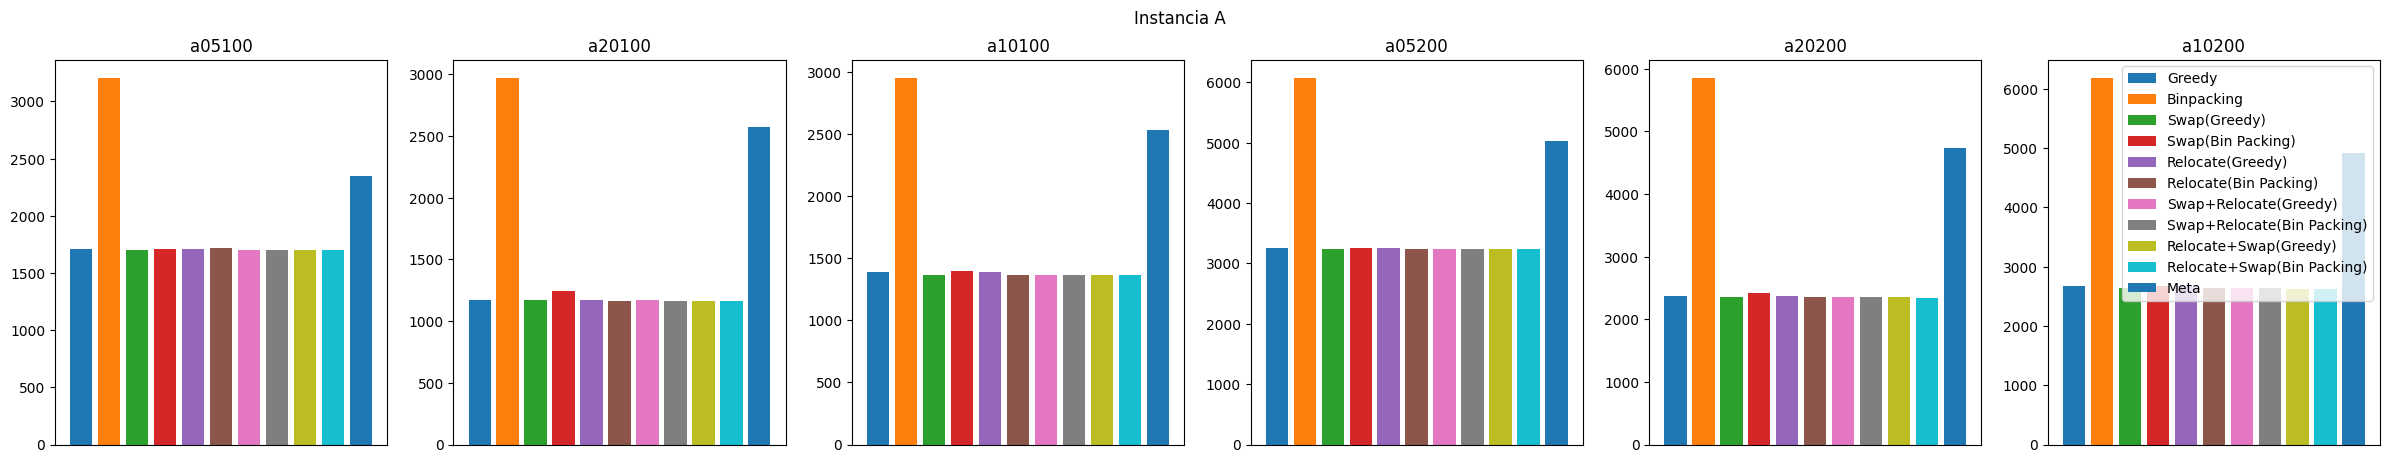

In [77]:
fig, axs = plt.subplots(1, len(a_instance), figsize=(30, 5))

for h in heuristics:
    # itter through a_instance rows
    for i in range(len(a_instance)):
        row = a_instance.iloc[i]
        axs[i].bar(h, row[h + "_cost"], label=h)

        # for tick in axs[i].get_xticklabels():
            # tick.set_rotation(90)

        # delete x_ticks
        axs[i].set_xticks([])

        axs[i].set_title(row["Filename"])
    
plt.legend()
fig.suptitle("Instancia A - Costo")

Text(0.5, 0.98, 'Instancia B')

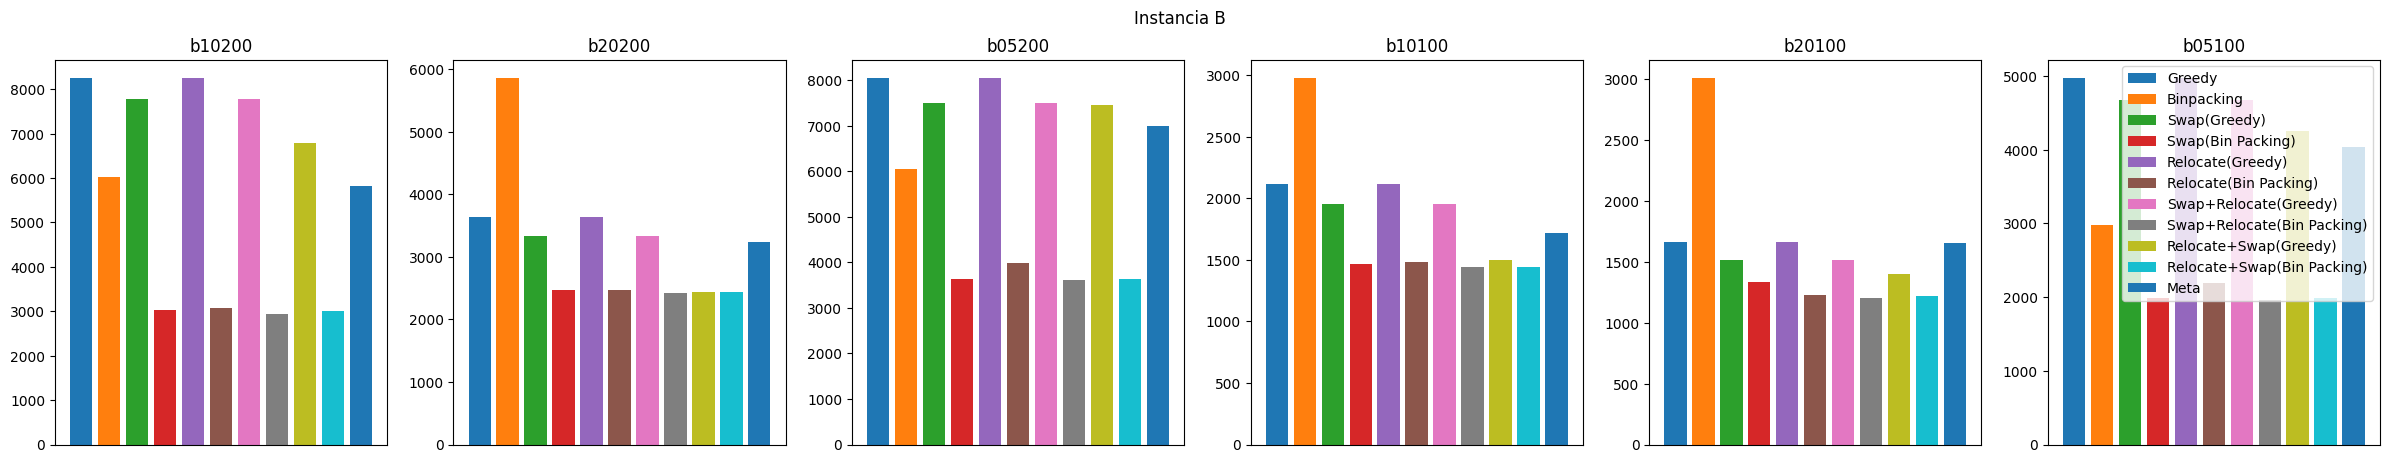

In [78]:
fig, axs = plt.subplots(1, len(b_instance), figsize=(30, 5))

for h in heuristics:
    # itter through b_instance rows
    for i in range(len(b_instance)):
        row = b_instance.iloc[i]
        axs[i].bar(h, row[h + "_cost"], label=h)

        # for tick in axs[i].get_xticklabels():
            # tick.set_rotation(90)

        # delete x_ticks
        axs[i].set_xticks([])

        axs[i].set_title(row["Filename"])
    
plt.legend()
fig.suptitle("Instancia B - Costo")

Text(0.5, 0.98, 'Instancia E')

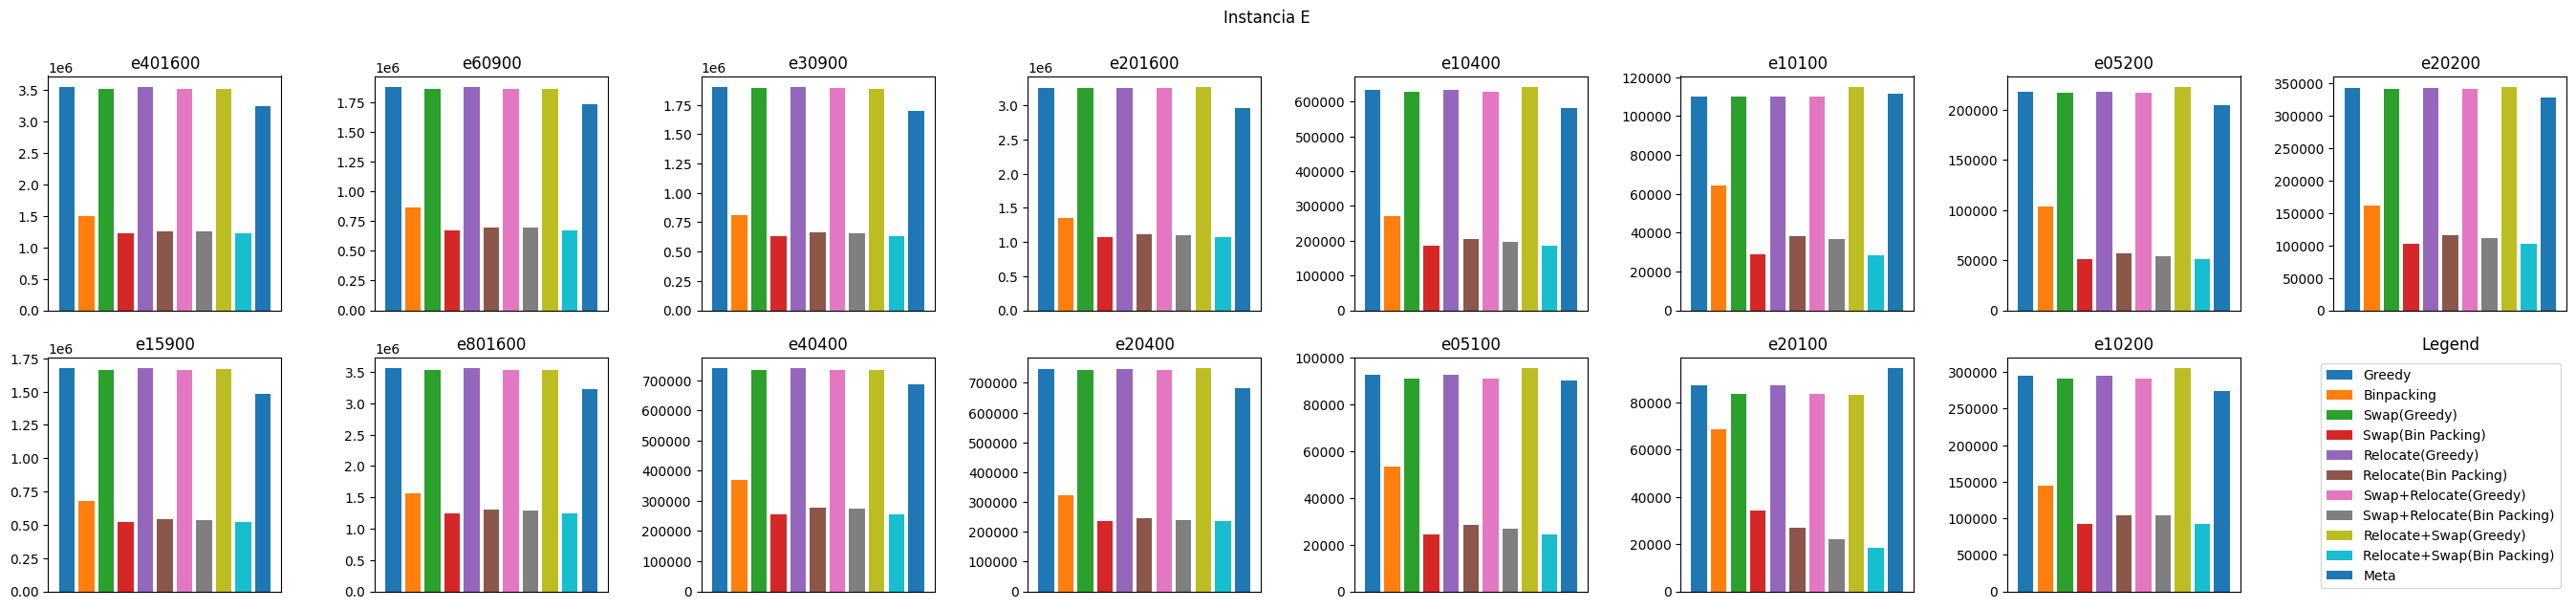

In [79]:
fig, axs = plt.subplots(2, len(e_instance)//2 + 1, figsize=(34, 7))

for h in heuristics:
    # itter through e_instance rows
    for i in range(len(e_instance)):
        row = e_instance.iloc[i]
        axs[i%2, i//2].bar(h, row[h + "_cost"], label=h)

        # for tick in axs[i].get_xticklabels():
            # tick.set_rotation(90)

        # delete x_ticks
        axs[i%2, i//2].set_xticks([])

        axs[i%2, i//2].set_title(row["Filename"])

    axs[1, len(e_instance)//2].bar(h, e_instance.iloc[-1][h + "_cost"], label=h, width=0)
    axs[1, len(e_instance)//2].set_xticks([])
    axs[1, len(e_instance)//2].set_yticks([])
    axs[1, len(e_instance)//2].set_title("Legend")
    # remove border
    axs[1, len(e_instance)//2].spines['top'].set_visible(False)
    axs[1, len(e_instance)//2].spines['right'].set_visible(False)
    axs[1, len(e_instance)//2].spines['bottom'].set_visible(False)
    axs[1, len(e_instance)//2].spines['left'].set_visible(False)


    
plt.legend()

#set space between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.2)

fig.suptitle("Instancia E - Costo")

Text(0.5, 0.98, 'Instancia E - Costo')

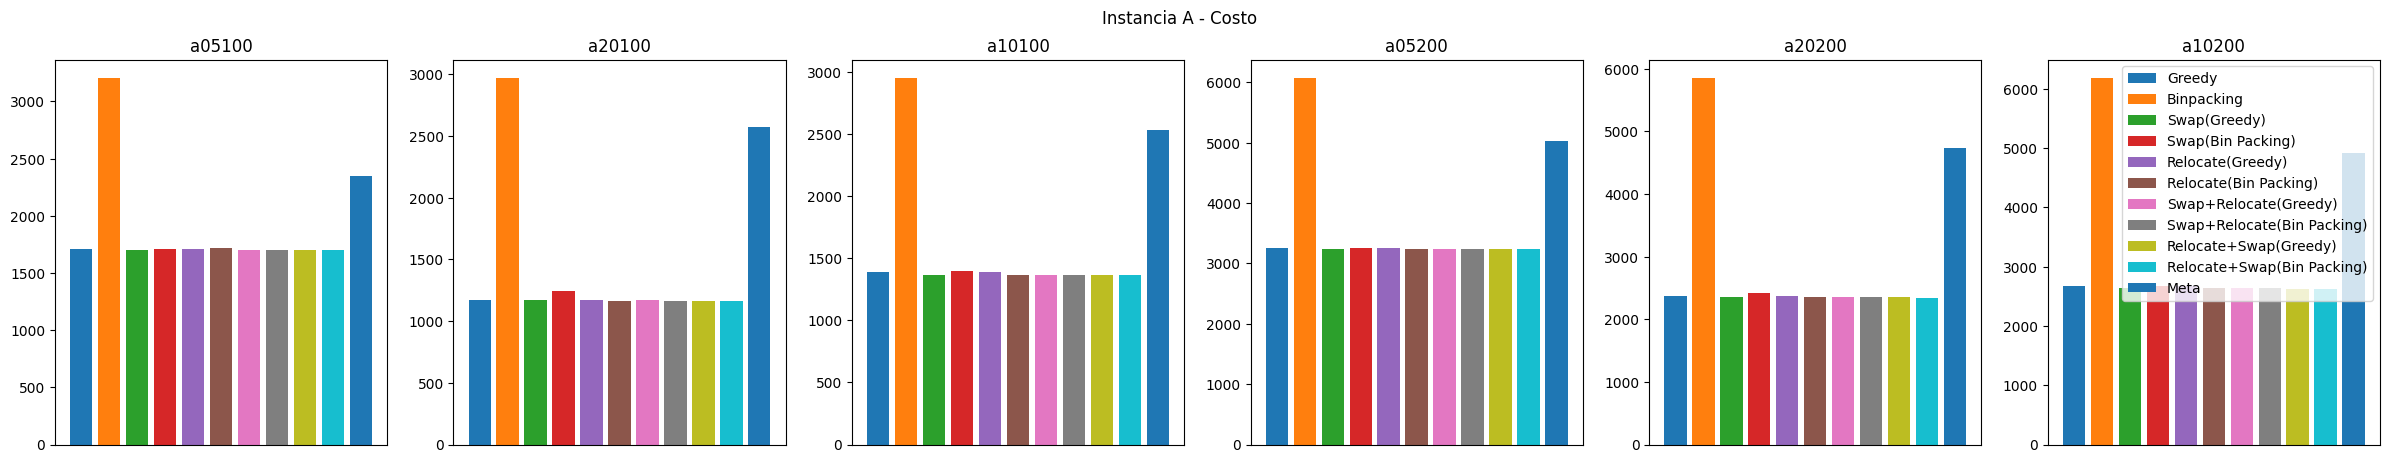

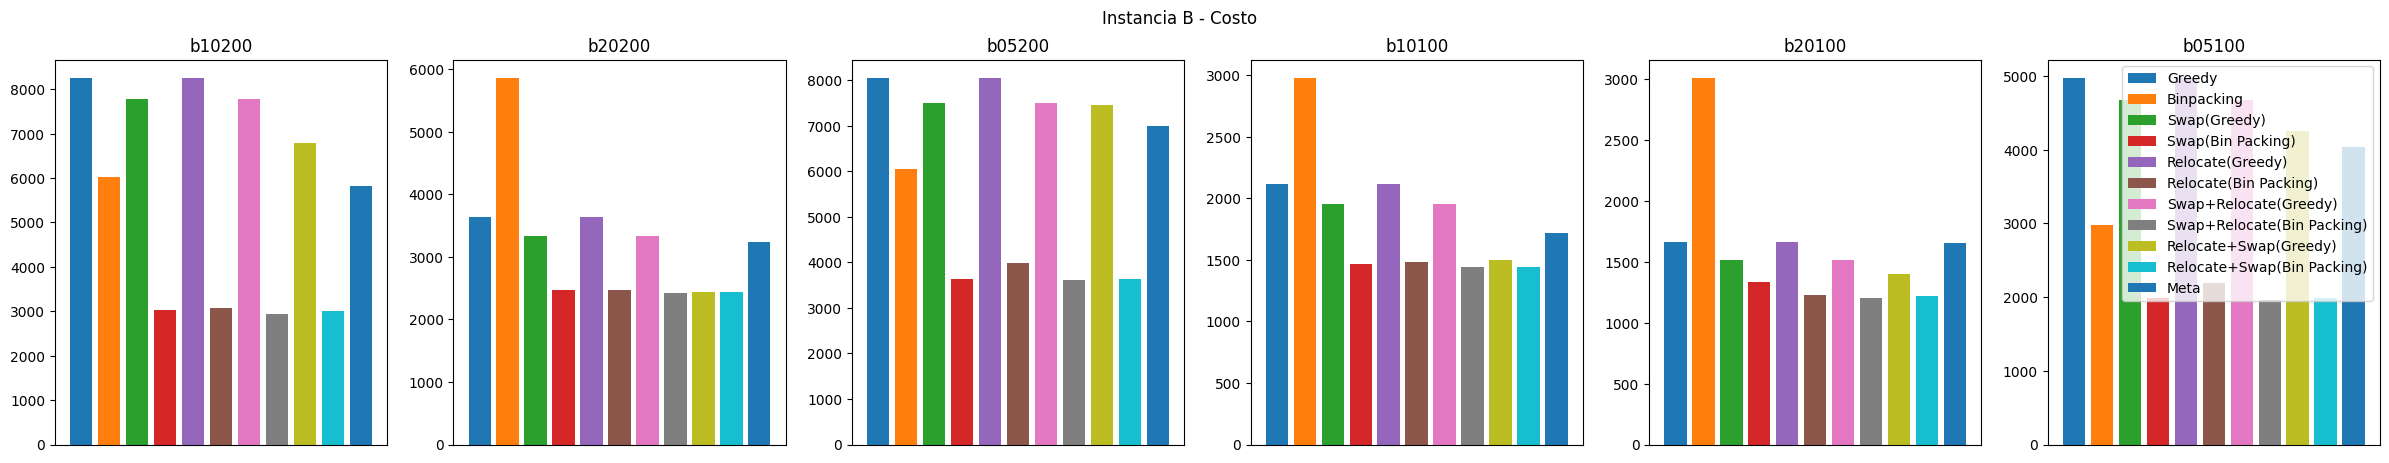

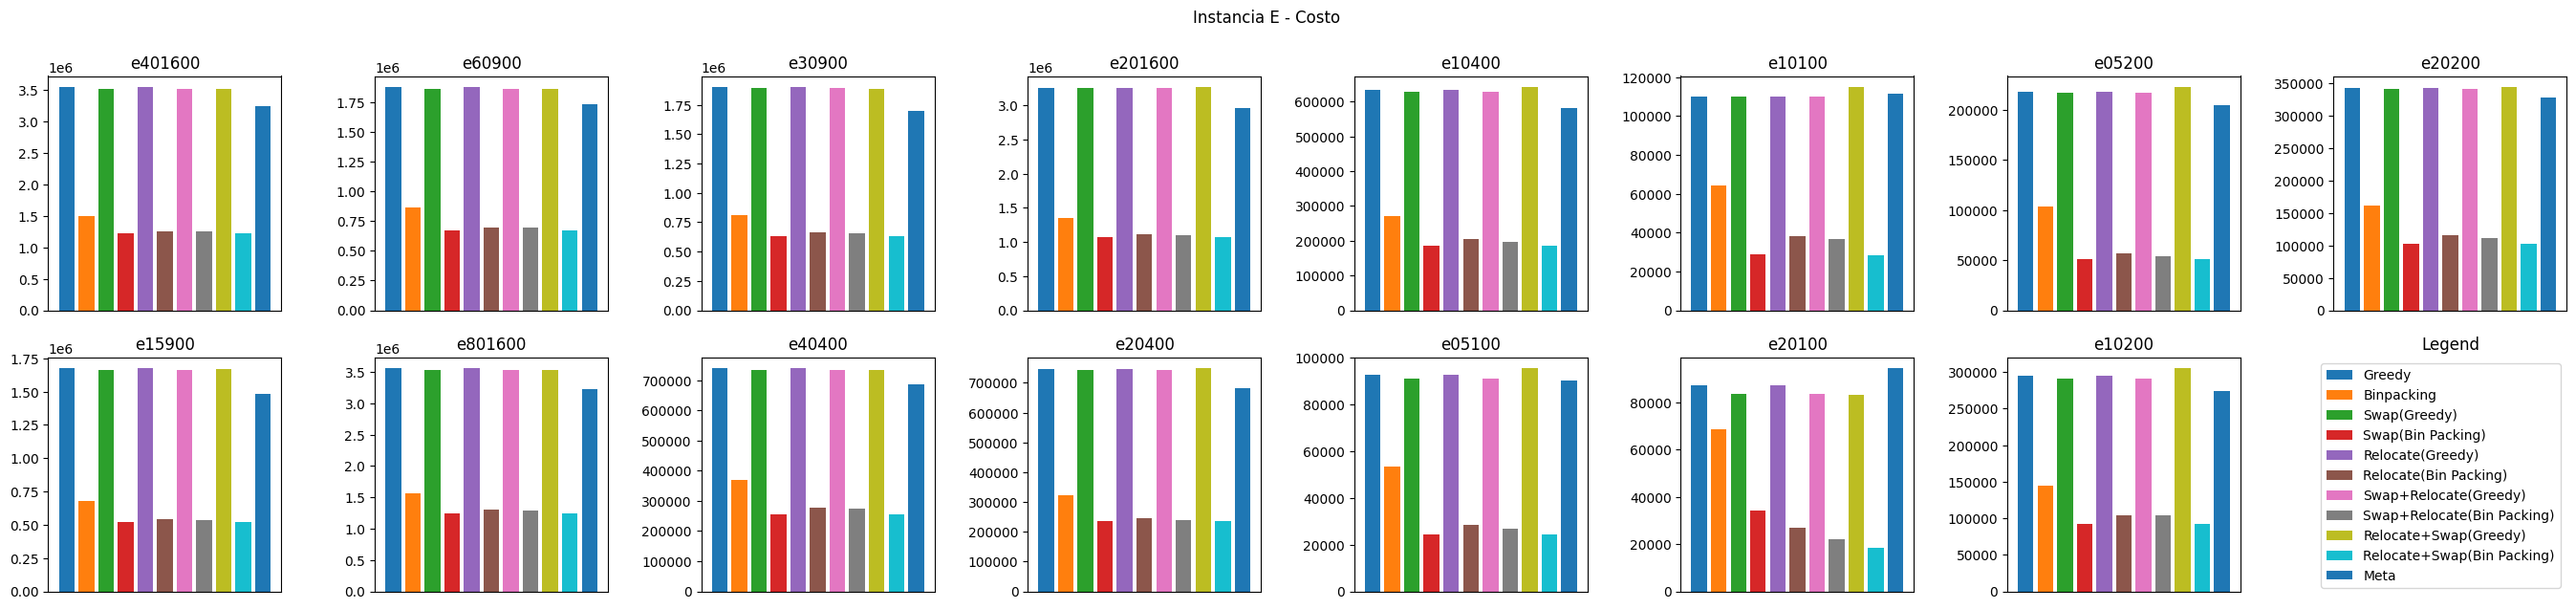

In [80]:
fig, axs = plt.subplots(1, len(a_instance), figsize=(30, 5))

for h in heuristics:
    # itter through a_instance rows
    for i in range(len(a_instance)):
        row = a_instance.iloc[i]
        axs[i].bar(h, row[h + "_cost"], label=h)

        # for tick in axs[i].get_xticklabels():
            # tick.set_rotation(90)

        # delete x_ticks
        axs[i].set_xticks([])

        axs[i].set_title(row["Filename"])
    
plt.legend()
fig.suptitle("Instancia A - Costo")

fig, axs = plt.subplots(1, len(b_instance), figsize=(30, 5))

for h in heuristics:
    # itter through b_instance rows
    for i in range(len(b_instance)):
        row = b_instance.iloc[i]
        axs[i].bar(h, row[h + "_cost"], label=h)

        # for tick in axs[i].get_xticklabels():
            # tick.set_rotation(90)

        # delete x_ticks
        axs[i].set_xticks([])

        axs[i].set_title(row["Filename"])
    
plt.legend()
fig.suptitle("Instancia B - Costo")

fig, axs = plt.subplots(2, len(e_instance)//2 + 1, figsize=(34, 7))

for h in heuristics:
    # itter through e_instance rows
    for i in range(len(e_instance)):
        row = e_instance.iloc[i]
        axs[i%2, i//2].bar(h, row[h + "_cost"], label=h)

        # for tick in axs[i].get_xticklabels():
            # tick.set_rotation(90)

        # delete x_ticks
        axs[i%2, i//2].set_xticks([])

        axs[i%2, i//2].set_title(row["Filename"])

    axs[1, len(e_instance)//2].bar(h, e_instance.iloc[-1][h + "_cost"], label=h, width=0)
    axs[1, len(e_instance)//2].set_xticks([])
    axs[1, len(e_instance)//2].set_yticks([])
    axs[1, len(e_instance)//2].set_title("Legend")
    # remove border
    axs[1, len(e_instance)//2].spines['top'].set_visible(False)
    axs[1, len(e_instance)//2].spines['right'].set_visible(False)
    axs[1, len(e_instance)//2].spines['bottom'].set_visible(False)
    axs[1, len(e_instance)//2].spines['left'].set_visible(False)


    
plt.legend()

#set space between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.2)

fig.suptitle("Instancia E - Costo")

Text(0.5, 0.98, 'Instancia E - Tiempo')

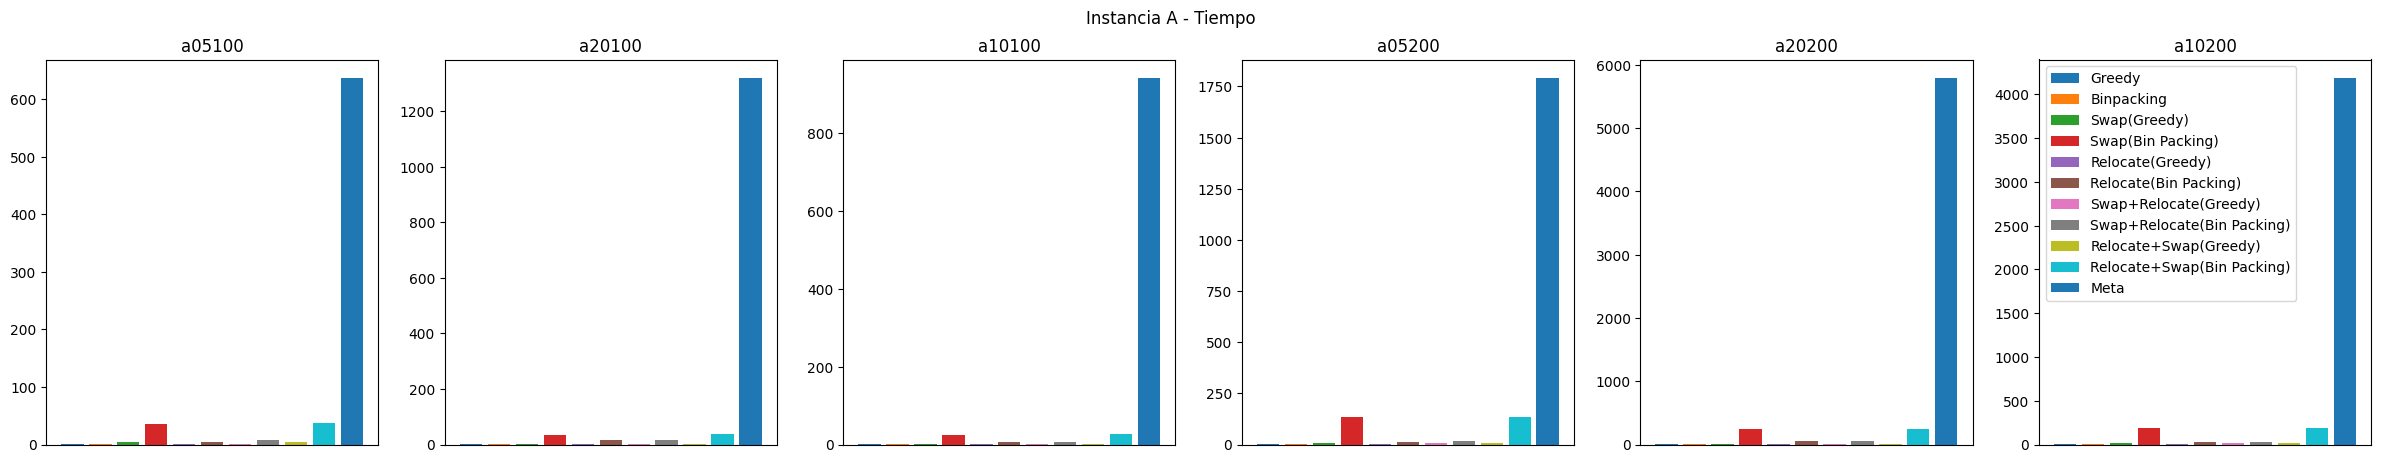

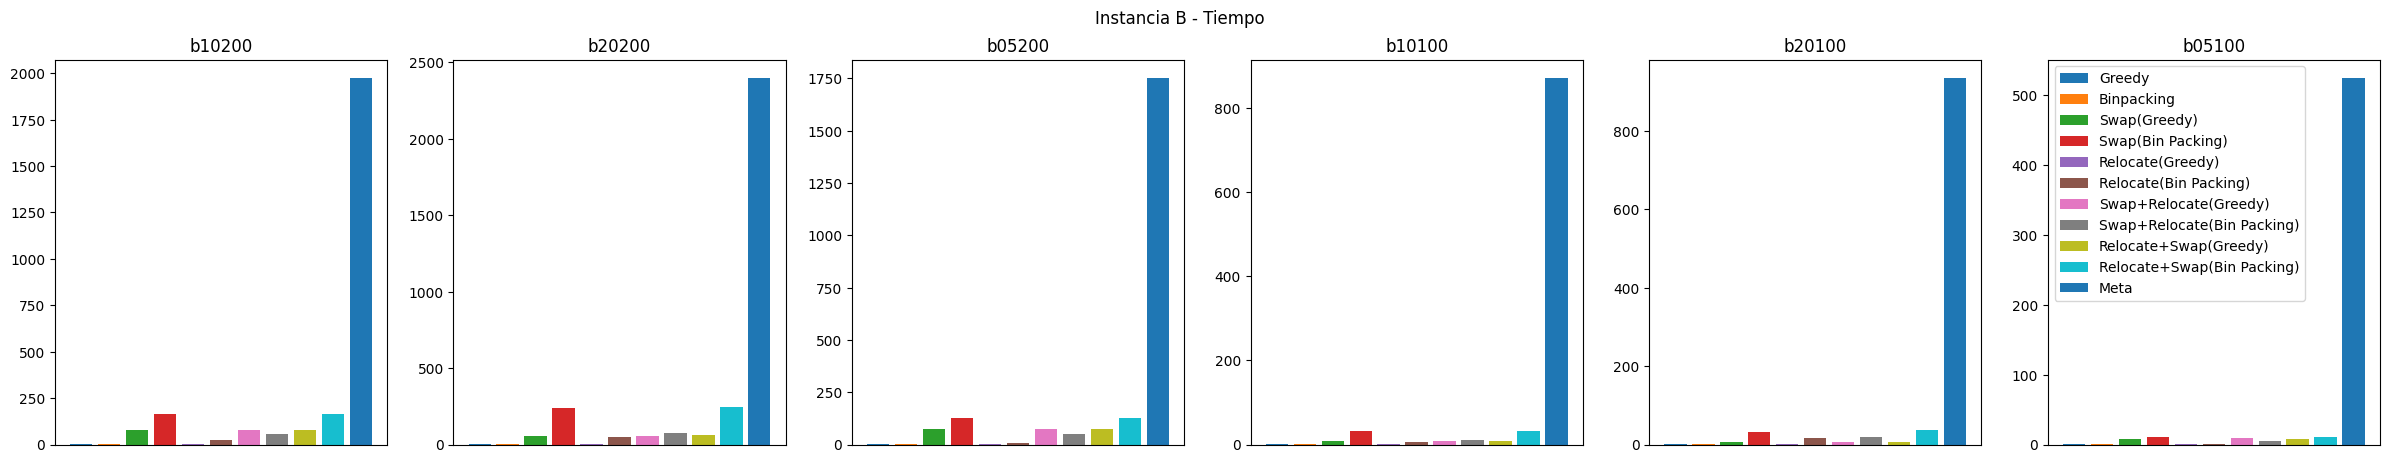

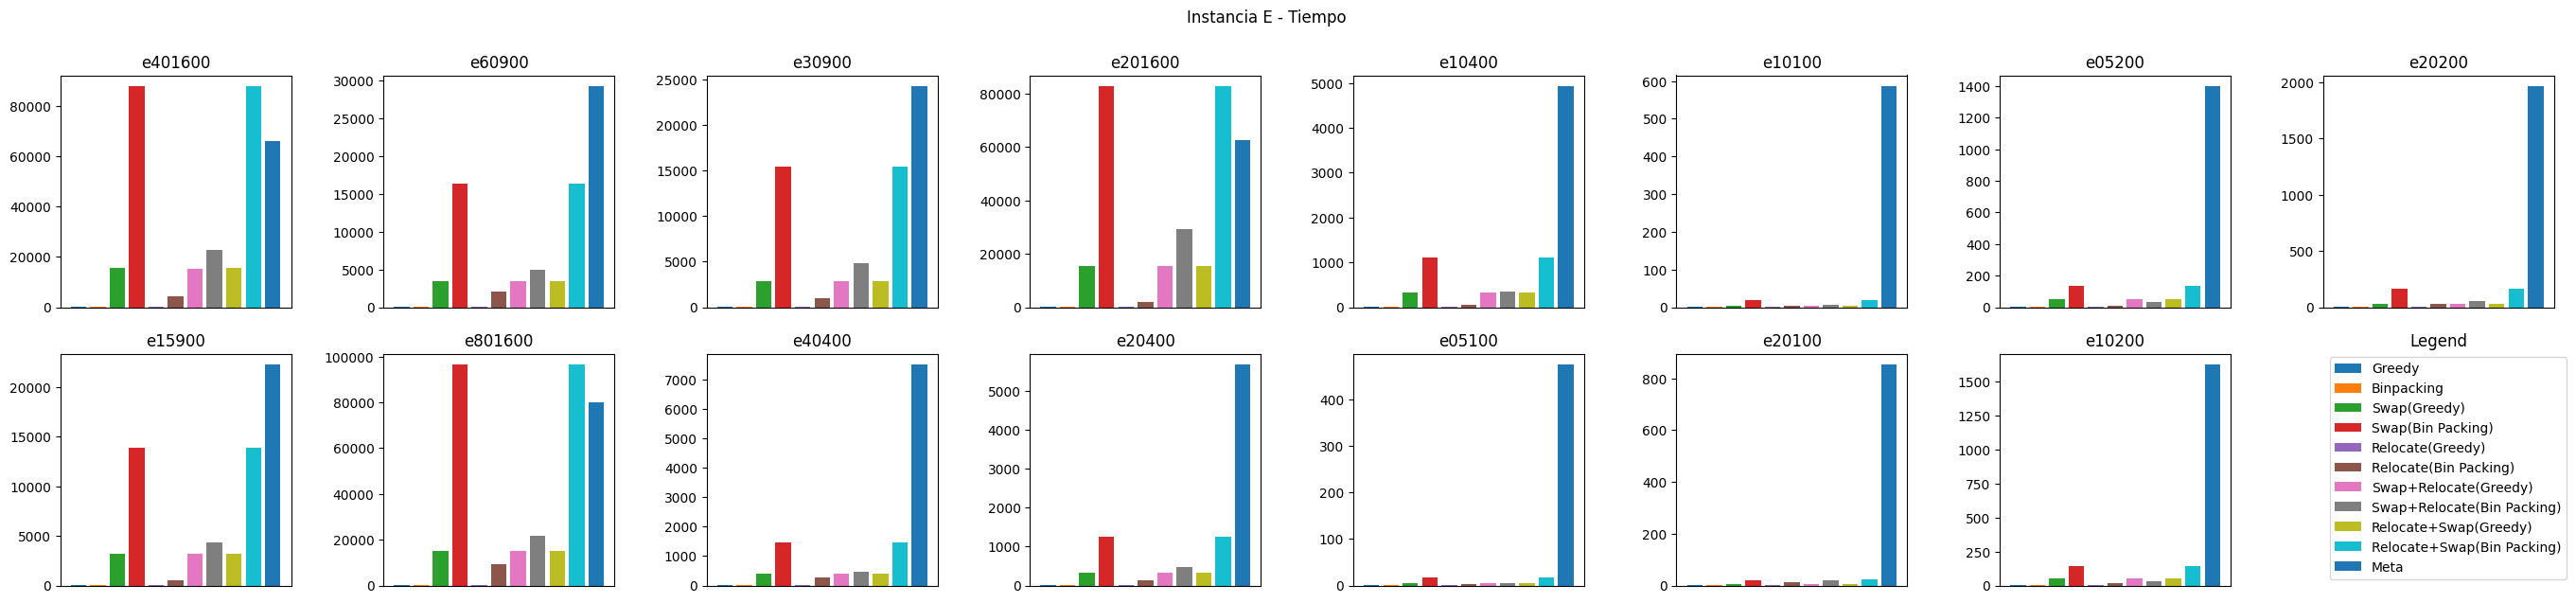

In [81]:
fig, axs = plt.subplots(1, len(a_instance), figsize=(30, 5))

for h in heuristics:
    # itter through a_instance rows
    for i in range(len(a_instance)):
        row = a_instance.iloc[i]
        axs[i].bar(h, row[h + "_time"], label=h)

        # for tick in axs[i].get_xticklabels():
            # tick.set_rotation(90)

        # delete x_ticks
        axs[i].set_xticks([])

        axs[i].set_title(row["Filename"])
    
plt.legend()
fig.suptitle("Instancia A - Tiempo")

fig, axs = plt.subplots(1, len(b_instance), figsize=(30, 5))

for h in heuristics:
    # itter through b_instance rows
    for i in range(len(b_instance)):
        row = b_instance.iloc[i]
        axs[i].bar(h, row[h + "_time"], label=h)

        # for tick in axs[i].get_xticklabels():
            # tick.set_rotation(90)

        # delete x_ticks
        axs[i].set_xticks([])

        axs[i].set_title(row["Filename"])
    
plt.legend()
fig.suptitle("Instancia B - Tiempo")

fig, axs = plt.subplots(2, len(e_instance)//2 + 1, figsize=(34, 7))

for h in heuristics:
    # itter through e_instance rows
    for i in range(len(e_instance)):
        row = e_instance.iloc[i]
        axs[i%2, i//2].bar(h, row[h + "_time"], label=h)

        # for tick in axs[i].get_xticklabels():
            # tick.set_rotation(90)

        # delete x_ticks
        axs[i%2, i//2].set_xticks([])

        axs[i%2, i//2].set_title(row["Filename"])

    axs[1, len(e_instance)//2].bar(h, e_instance.iloc[-1][h + "_time"], label=h, width=0)
    axs[1, len(e_instance)//2].set_xticks([])
    axs[1, len(e_instance)//2].set_yticks([])
    axs[1, len(e_instance)//2].set_title("Legend")
    # remove border
    axs[1, len(e_instance)//2].spines['top'].set_visible(False)
    axs[1, len(e_instance)//2].spines['right'].set_visible(False)
    axs[1, len(e_instance)//2].spines['bottom'].set_visible(False)
    axs[1, len(e_instance)//2].spines['left'].set_visible(False)


    
plt.legend()

#set space between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.2)

fig.suptitle("Instancia E - Tiempo")

Text(0.5, 0.98, 'Instancia E - Sin Asignar')

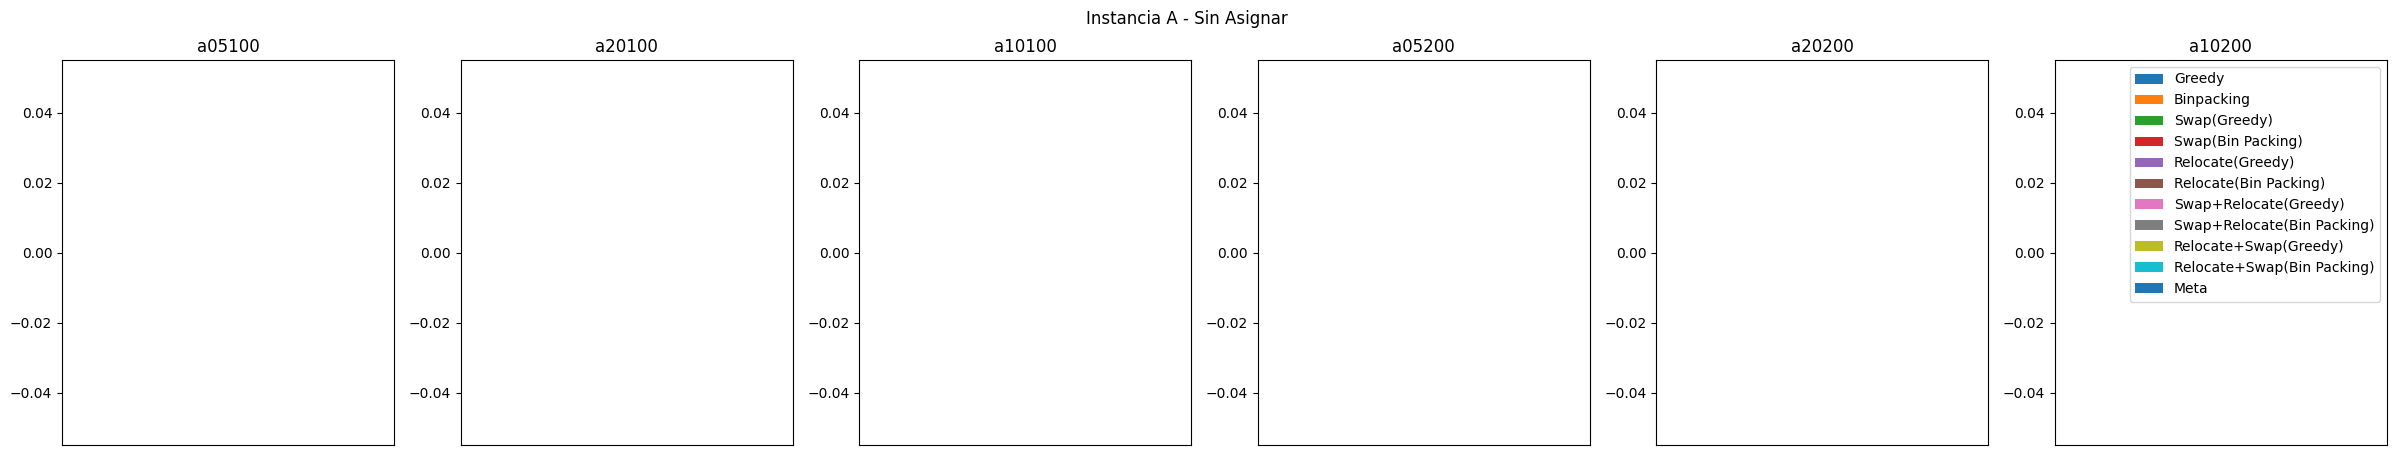

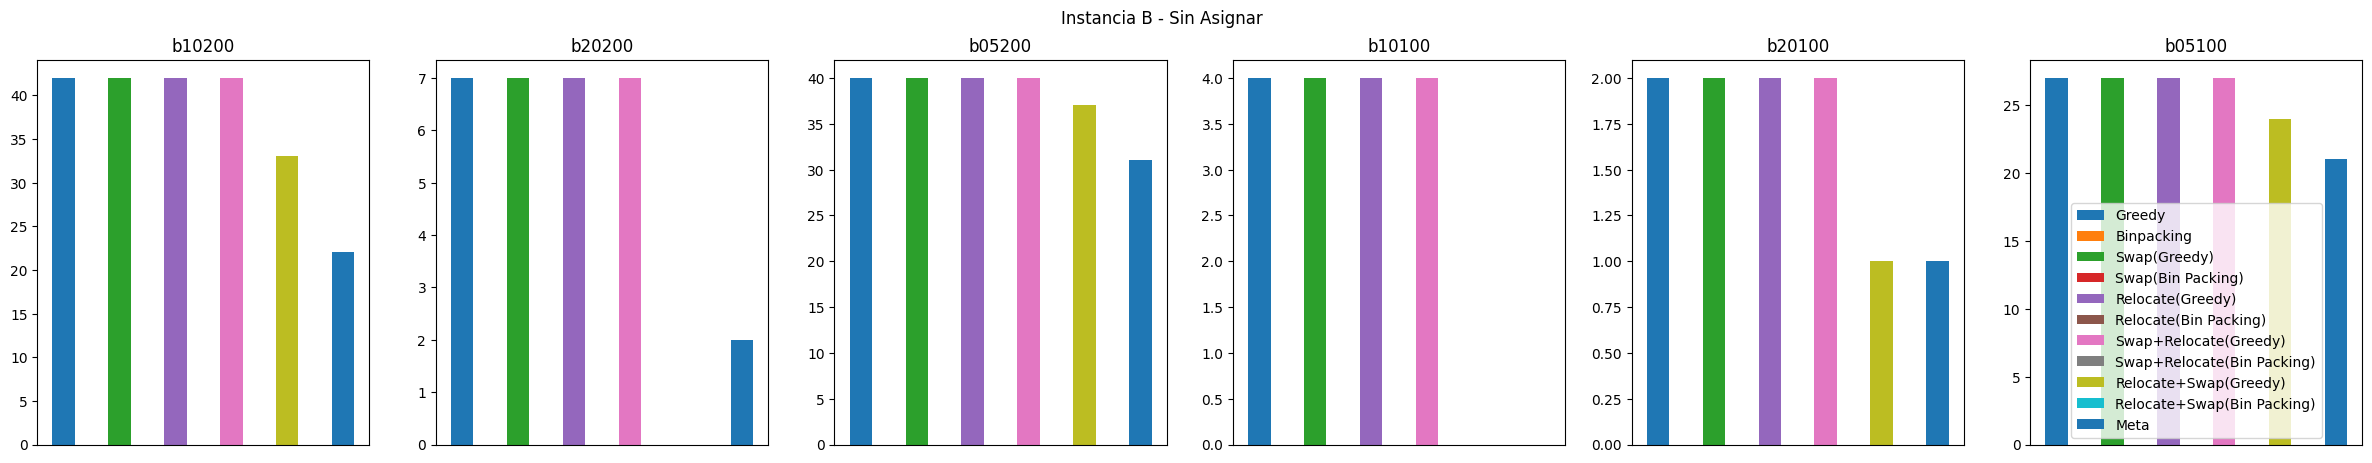

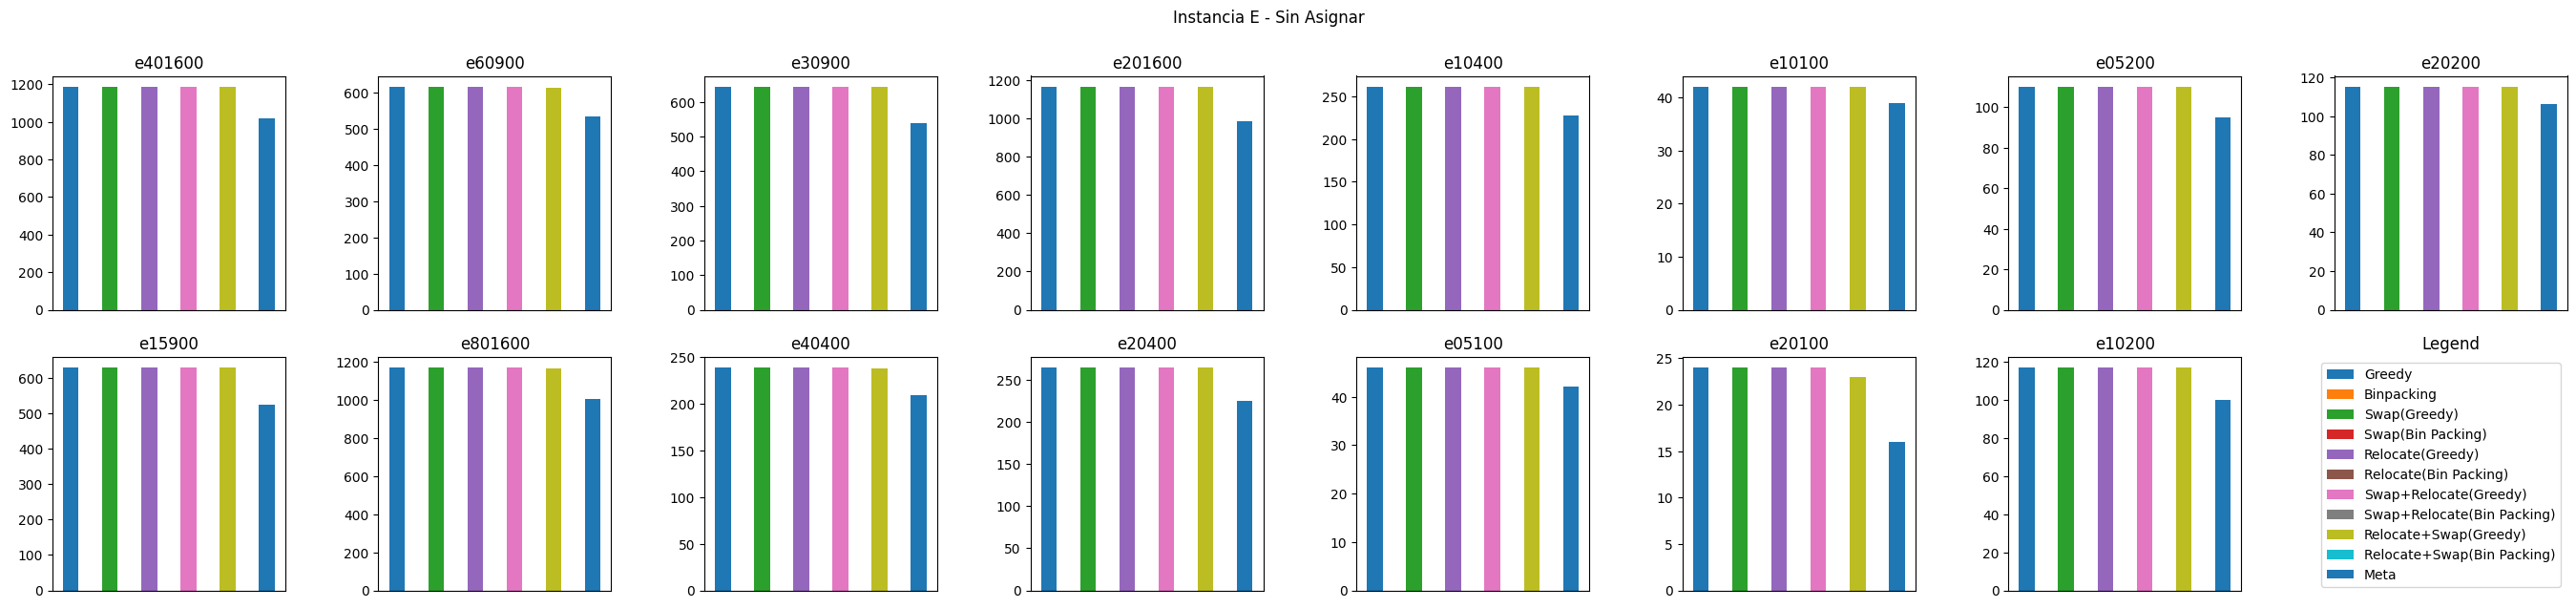

In [82]:
fig, axs = plt.subplots(1, len(a_instance), figsize=(30, 5))

for h in heuristics:
    # itter through a_instance rows
    for i in range(len(a_instance)):
        row = a_instance.iloc[i]
        axs[i].bar(h, row[h + "_free"], label=h)

        # for tick in axs[i].get_xticklabels():
            # tick.set_rotation(90)

        # delete x_ticks
        axs[i].set_xticks([])

        axs[i].set_title(row["Filename"])
    
plt.legend()
fig.suptitle("Instancia A - Sin Asignar")

fig, axs = plt.subplots(1, len(b_instance), figsize=(30, 5))

for h in heuristics:
    # itter through b_instance rows
    for i in range(len(b_instance)):
        row = b_instance.iloc[i]
        axs[i].bar(h, row[h + "_free"], label=h)

        # for tick in axs[i].get_xticklabels():
            # tick.set_rotation(90)

        # delete x_ticks
        axs[i].set_xticks([])

        axs[i].set_title(row["Filename"])
    
plt.legend()
fig.suptitle("Instancia B - Sin Asignar")

fig, axs = plt.subplots(2, len(e_instance)//2 + 1, figsize=(34, 7))

for h in heuristics:
    # itter through e_instance rows
    for i in range(len(e_instance)):
        row = e_instance.iloc[i]
        axs[i%2, i//2].bar(h, row[h + "_free"], label=h)

        # for tick in axs[i].get_xticklabels():
            # tick.set_rotation(90)

        # delete x_ticks
        axs[i%2, i//2].set_xticks([])

        axs[i%2, i//2].set_title(row["Filename"])

    axs[1, len(e_instance)//2].bar(h, e_instance.iloc[-1][h + "_free"], label=h, width=0)
    axs[1, len(e_instance)//2].set_xticks([])
    axs[1, len(e_instance)//2].set_yticks([])
    axs[1, len(e_instance)//2].set_title("Legend")
    # remove border
    axs[1, len(e_instance)//2].spines['top'].set_visible(False)
    axs[1, len(e_instance)//2].spines['right'].set_visible(False)
    axs[1, len(e_instance)//2].spines['bottom'].set_visible(False)
    axs[1, len(e_instance)//2].spines['left'].set_visible(False)


    
plt.legend()

#set space between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.2)

fig.suptitle("Instancia E - Sin Asignar")

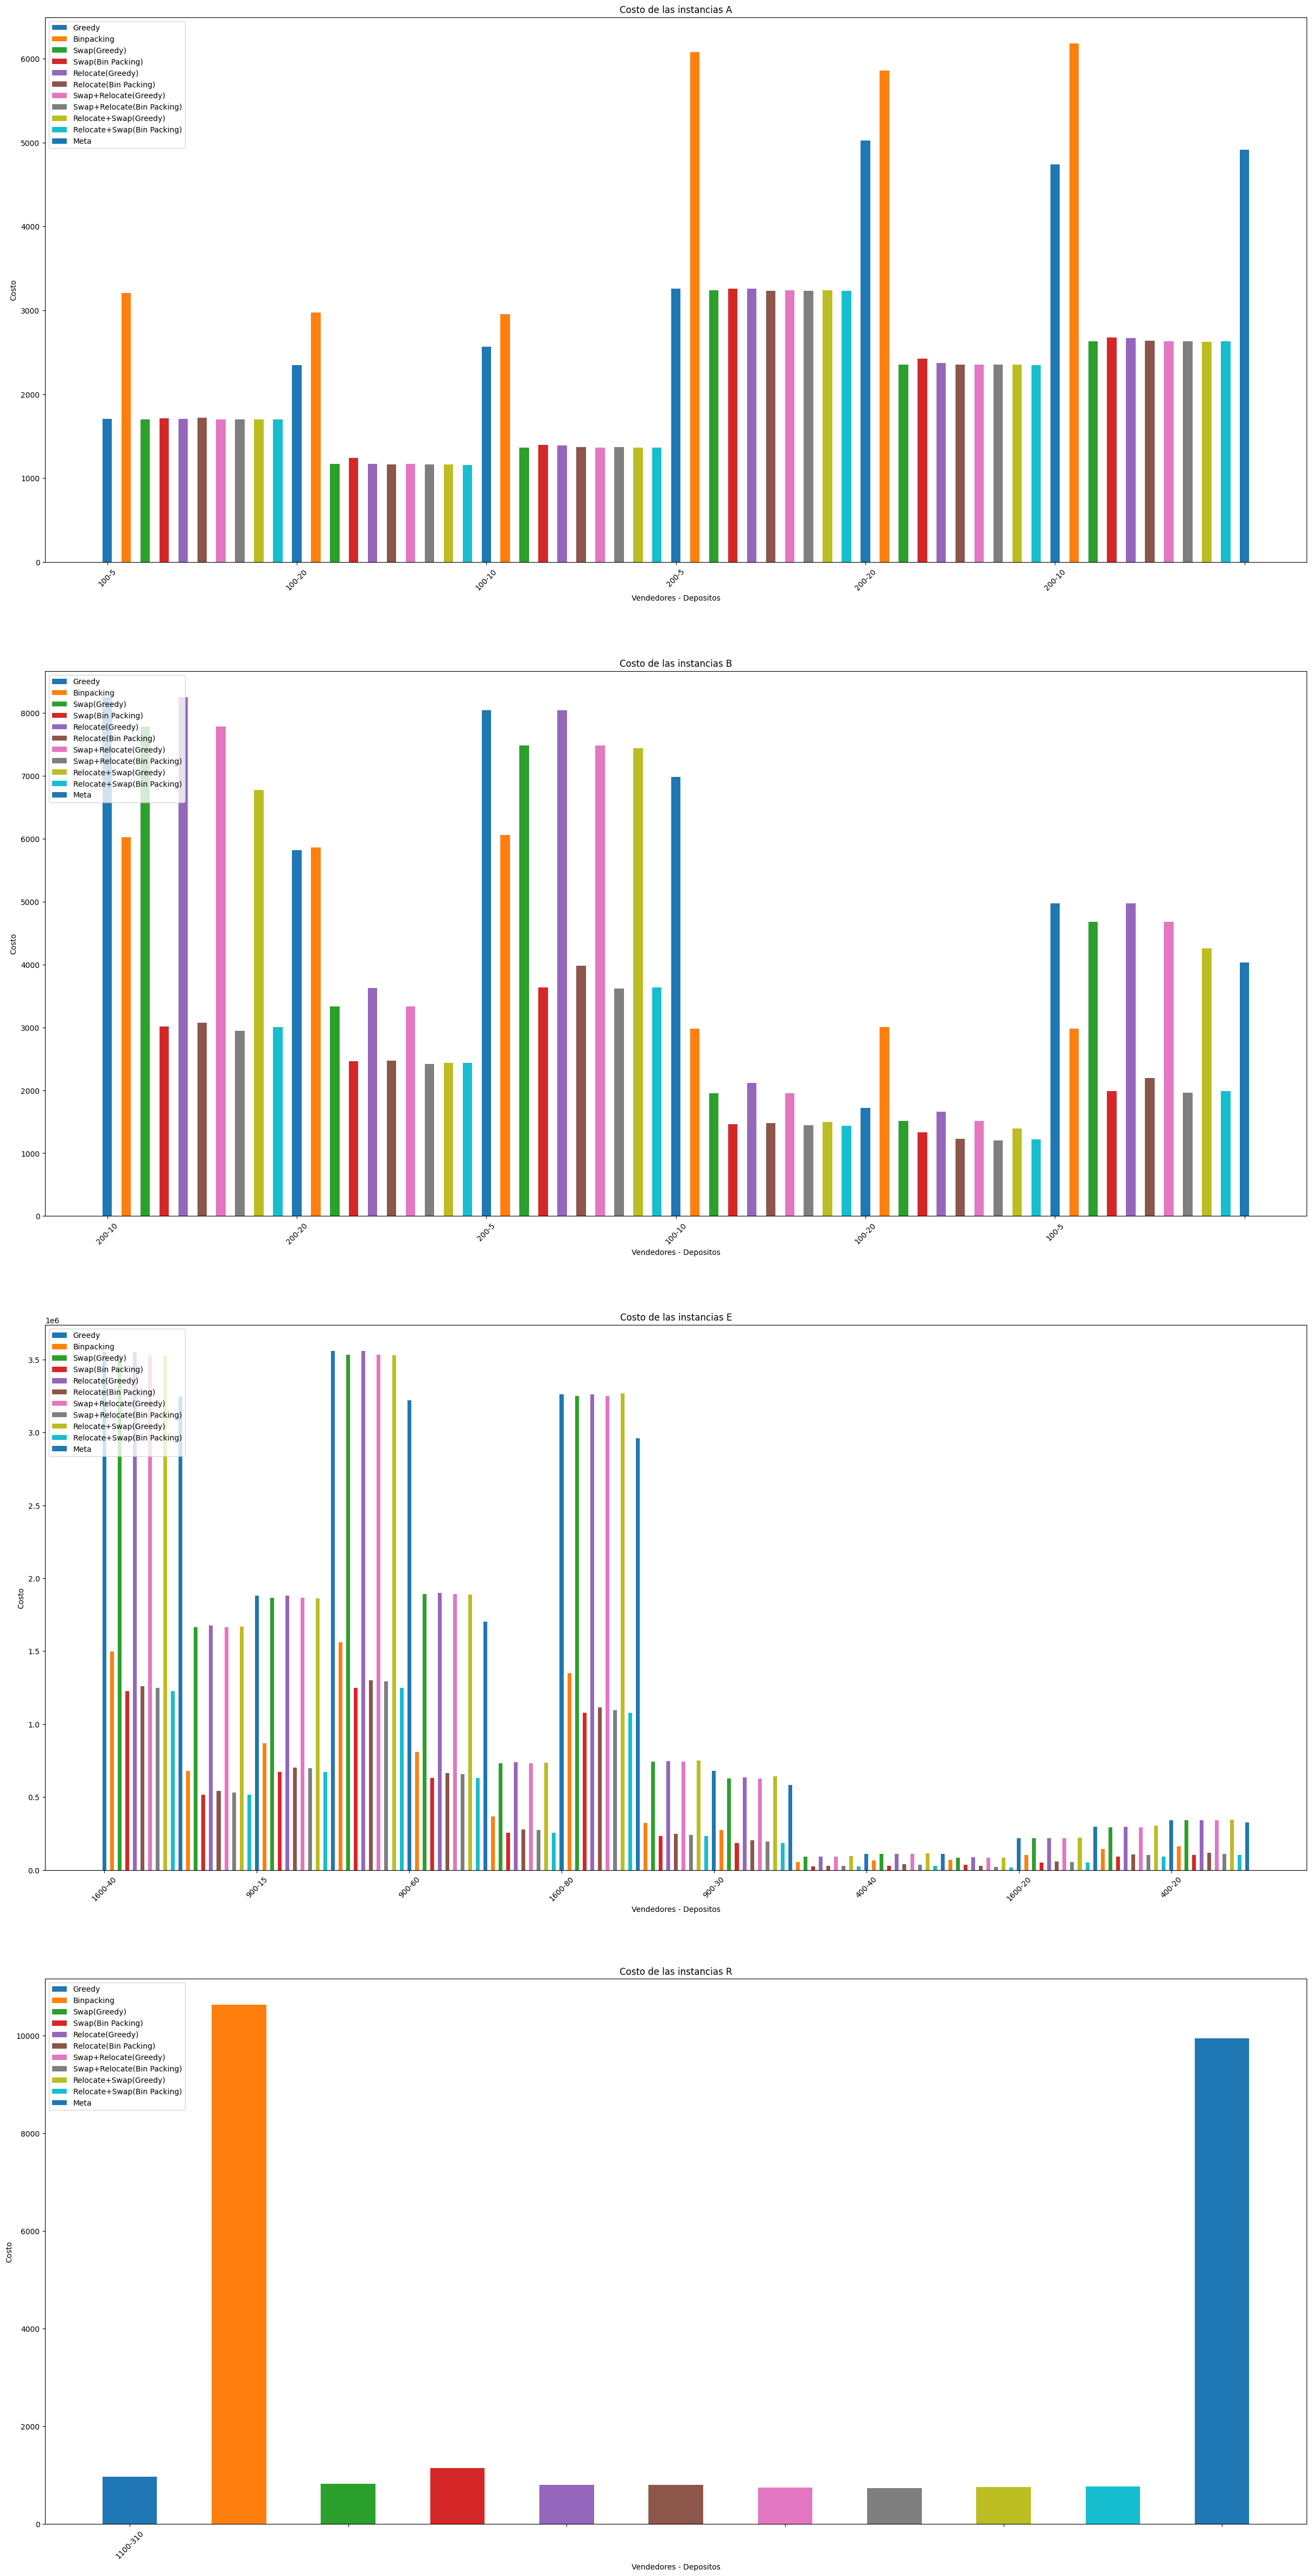

In [72]:
fig, axs = plt.subplots(len(costs), 1, figsize=(30, 60))

for i, cost in enumerate(costs):

    cost['Vendedores-Depositos'] = cost['Vendedores'].astype(str) + '-' + cost['Depositos'].astype(str)

    axs[i].set_title('Costo de las instancias ' + cost['InstanceGroup'].unique()[0].upper())
    axs[i].set_xlabel('Vendedores - Depositos')
    axs[i].set_ylabel('Costo')

    for h in heuristics:
        axs[i].bar(np.arange(len(cost['Vendedores-Depositos'])) + (heuristics == h).argmax() * 0.1, cost[h+"_cost"], width=0.05, label=h)

    axs[i].legend()

    # add division between 'Vendedores-Depositos'

    axs[i].set_xticklabels([""] + list(cost['Vendedores-Depositos']))



for i, ax in enumerate(axs):
    ax.set_xticklabels([""] + list(costs[i]['Vendedores-Depositos']))
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    ax.legend(loc='upper left')

    # leave some space between subplots



### 2. TIEMPOS

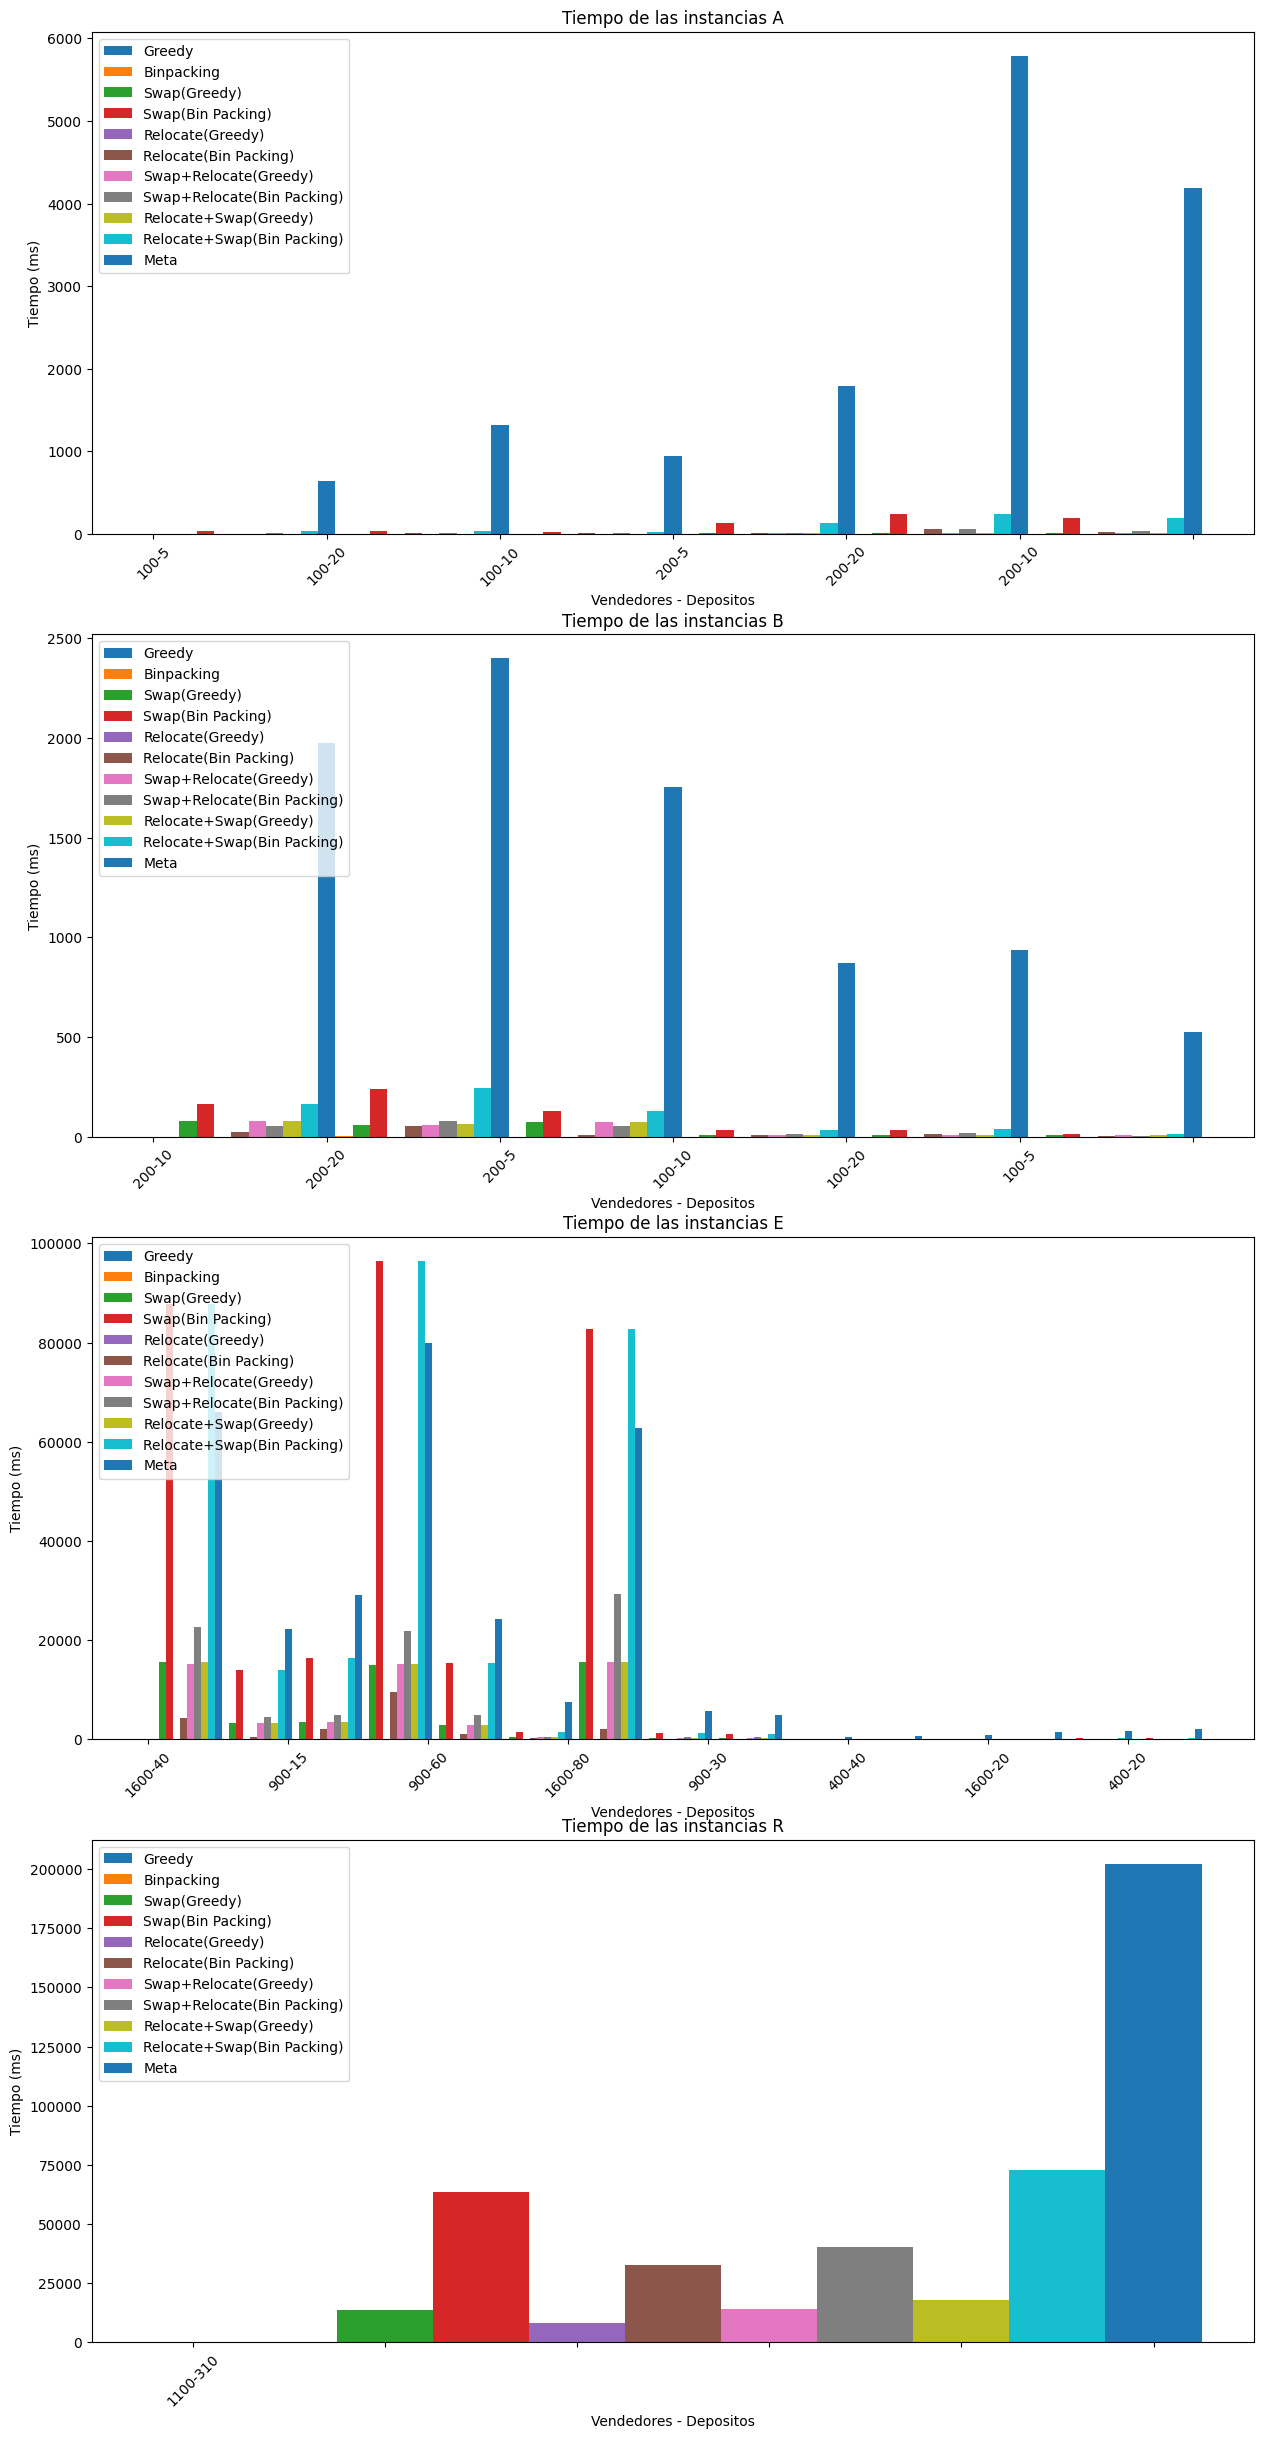

In [73]:
fig, axs = plt.subplots(len(times), 1, figsize=(15, 30))

for i, time in enumerate(times):

    time['Vendedores-Depositos'] = time['Vendedores'].astype(str) + '-' + time['Depositos'].astype(str)

    axs[i].set_title('Tiempo de las instancias ' + time['InstanceGroup'].unique()[0].upper())
    axs[i].set_xlabel('Vendedores - Depositos')
    axs[i].set_ylabel('Tiempo (ms)')

    for h in heuristics:
        # Bar plot
        axs[i].bar(np.arange(len(time['Vendedores-Depositos'])) + (heuristics == h).argmax() * 0.1, time[h+"_time"], width=0.1, label=h)

    axs[i].legend()

for i, ax in enumerate(axs):
    ax.set_xticklabels([""] + list(times[i]['Vendedores-Depositos']))
    # rotate x tick labels
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    ax.legend(loc='upper left')


## Cantidad de vendedores sin asignar

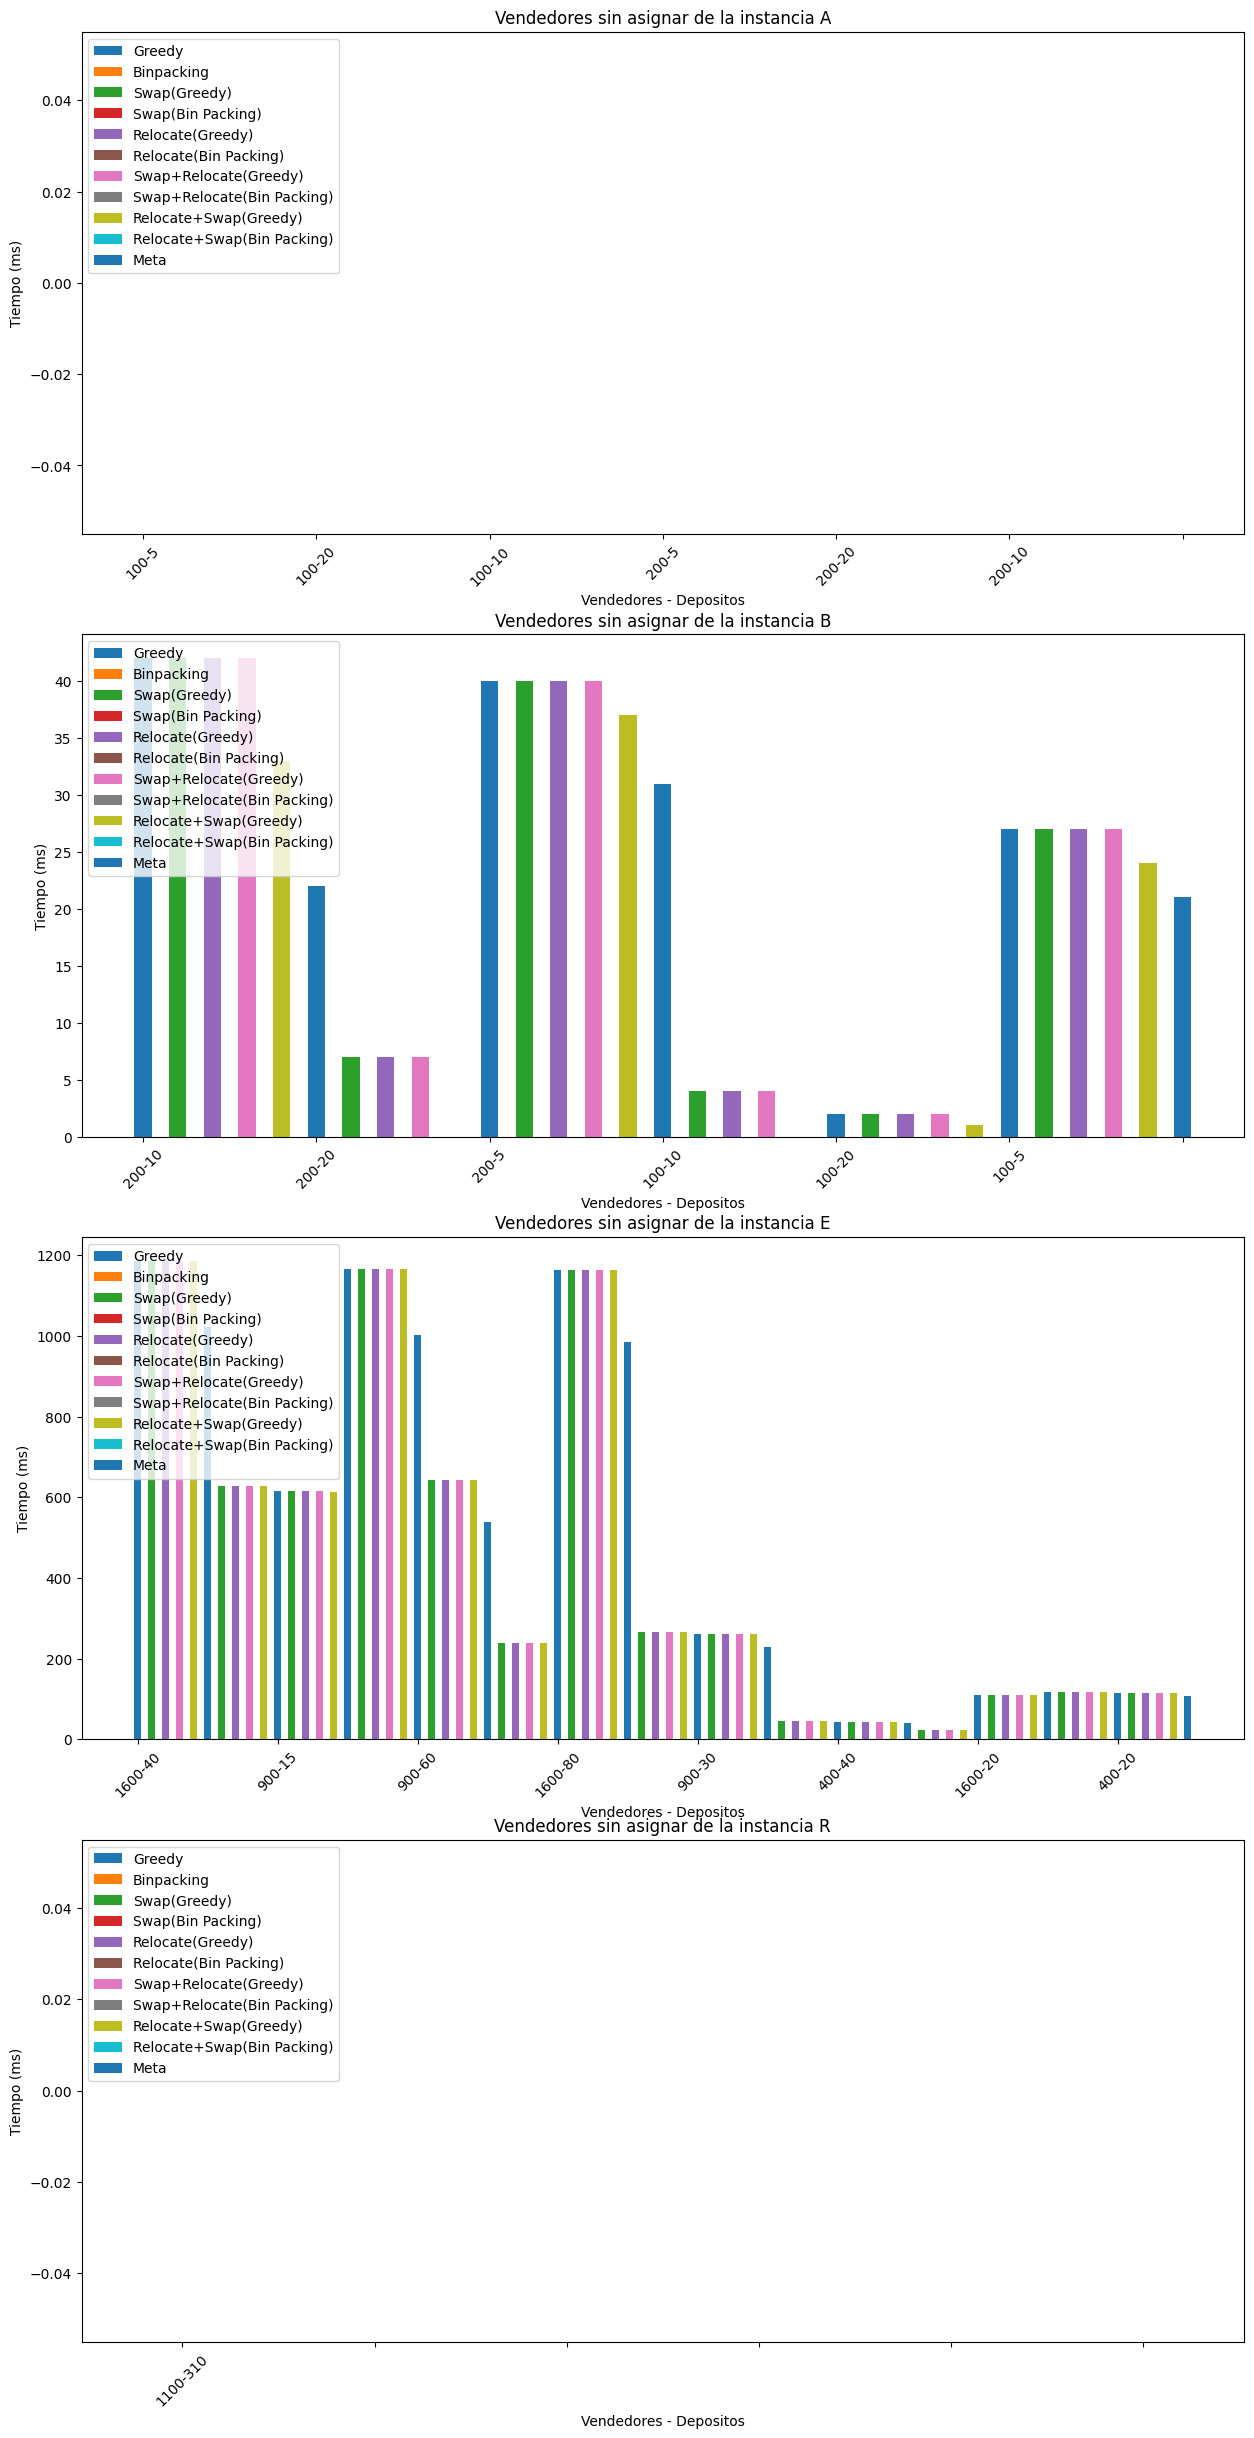

In [74]:
fig, axs = plt.subplots(len(frees), 1, figsize=(15, 30))

for i, free in enumerate(frees):

    free['Vendedores-Depositos'] = free['Vendedores'].astype(str) + '-' + free['Depositos'].astype(str)

    axs[i].set_title('Vendedores sin asignar de la instancia ' + free['InstanceGroup'].unique()[0].upper())
    axs[i].set_xlabel('Vendedores - Depositos')
    axs[i].set_ylabel('Tiempo (ms)')

    for h in heuristics:
        # Bar plot
        axs[i].bar(np.arange(len(free['Vendedores-Depositos'])) + (heuristics == h).argmax() * 0.1, free[h+"_free"], width=0.1, label=h)

    axs[i].legend()

for i, ax in enumerate(axs):
    ax.set_xticklabels([""] + list(frees[i]['Vendedores-Depositos']))
    # rotate x tick labels
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    ax.legend(loc='upper left')


### 3. INSTANCIA REAL

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].set_title('Costo de la instancia real')
axs[0].set_xlabel('Algoritmos')
axs[0].set_ylabel('Costo')

axs[0].bar(np.arange(len(real_instance[3::2])), real_instance[3::2], align='center', alpha=0.5, width=1)
# axs[0].set_xticklabels([""] + [x[:-5] for x in real_instance.index[3::2]])
axs[0].set_xticklabels([""])

axs[1].set_title('Tiempo de la instancia real')
axs[1].set_xlabel('Algoritmos')
axs[1].set_ylabel('Tiempo (ms)')

axs[1].bar(np.arange(len(real_instance[4::2])), real_instance[4::2], align='center', alpha=0.5, width=1)
# axs[1].set_xticklabels([""] + [x[:-5] for x in real_instance.index[4::2]])

axs[0].legend(['Vendedores: ' + str(real_instance[1]) + ' - Depositos: ' + str(real_instance[2])])
axs[1].legend(['Vendedores: ' + str(real_instance[1]) + ' - Depositos: ' + str(real_instance[2])])

for ax in axs:
    for tick in ax.get_xticklabels():
        tick.set_rotation(20)

_ = plt.show()

In [ ]:
real_instance[heuristics + '_cost']

In [ ]:
real_instance[heuristics + '_time']